In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geobr

In [2]:
snis = pd.read_excel('dados/indicadores-sanepar-20-21.xlsx')

In [3]:
snis = snis.drop(snis.index[-1])

In [4]:
#variáveis analisadas
filtro = [
    'Código do Município',    
    'Município',
    'Ano de Referência',
    'Prestador',
    'GE017 - Ano de vencimento da delegação de abastecimento de água',
    'POP_TOT - População total do município do ano de referência (Fonte: IBGE):',
    'AG001 - População total atendida com abastecimento de água',
    'Tipo de serviço',
    'AG026 - População urbana atendida com abastecimento de água',
    'AG002 - Quantidade de ligações ativas de água',
    'AG006 - Volume de água produzido',
    'AG011 - Volume de água faturado',
    'AG010 - Volume de água consumido',
    'QD002 - Quantidades de paralisações no sistema de distribuição de água',
    'IN076 - Incidência das análises de turbidez fora do padrão',
    'QD027 - Quantidade de amostras para coliformes totais com resultados fora do padrão',
    'IN079 - Índice de conformidade da quantidade de amostras - cloro residual',
    'ES001 - População total atendida com esgotamento sanitário',
    'ES002 - Quantidade de ligações ativas de esgotos',
    'ES005 - Volume de esgotos coletado',
    'ES007 - Volume de esgotos faturado',
    'ES006 - Volume de esgotos tratado',
    'ES004 - Extensão da rede de esgotos',
    ]

In [5]:
filtro_groupby = ['POP_TOT - População total do município do ano de referência (Fonte: IBGE):',
    'AG001 - População total atendida com abastecimento de água',
    'Tipo de serviço',
    'AG026 - População urbana atendida com abastecimento de água',
    'AG002 - Quantidade de ligações ativas de água',
    'AG006 - Volume de água produzido',
    'AG011 - Volume de água faturado',
    'AG010 - Volume de água consumido',
    'QD002 - Quantidades de paralisações no sistema de distribuição de água',
    'IN076 - Incidência das análises de turbidez fora do padrão',
    'QD027 - Quantidade de amostras para coliformes totais com resultados fora do padrão',
    'IN079 - Índice de conformidade da quantidade de amostras - cloro residual',
    'ES001 - População total atendida com esgotamento sanitário',
    'ES002 - Quantidade de ligações ativas de esgotos',
    'ES005 - Volume de esgotos coletado',
    'ES007 - Volume de esgotos faturado',
    'ES006 - Volume de esgotos tratado',
    'ES004 - Extensão da rede de esgotos']

In [6]:
snis_filtrada = snis[filtro]

In [7]:
snis_filtrada.to_excel('dados/snis_filtrada.xlsx')

### Funções

In [8]:
def variacao(base, variavel): #cria uma tabela com a variação percentual e nominal de uma variável
    df = pd.crosstab([base['Código do Município'], base['Município']], base['Ano de Referência'], base[variavel], aggfunc='sum')

    df['variação'] = round((df[2021] - df[2020]) *100 / df[2020], 2)
    df['variação nominal'] = df[2021] - df[2020]
    df = df.sort_values(by='variação', ascending=False)
    return df


In [9]:
def mapa_muni(tabela, legenda):
    df = pd.DataFrame(tabela.reset_index())
    #merge dfs
    # All municipalities in the state of Alagoas
    muni = geobr.read_municipality(code_muni="PR", year=2020)
    muni['code_muni'] = muni['code_muni']/10
    muni['code_muni'] = muni['code_muni'].values.astype(int)
    df_merge = muni.merge(df, how="left", left_on="code_muni", right_on='Código do Município')
    plt.rcParams.update({"font.size": 5})

    fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
    df_merge.plot(
        column="variação",
        cmap="RdYlGn",
        legend=True,
        legend_kwds={
            "label": legenda,
            "orientation": "horizontal",
            "shrink": 0.6,
        },
        ax=ax,
    )

    #ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
    ax.axis("off")
    plt.savefig(f'graficos/{legenda}.jpeg', bbox_inches='tight')


In [10]:
def barra_total(tabela, legenda):

    df_total = pd.DataFrame(tabela[[2020,2021]].sum())
    df_total = df_total.T
    fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
    sns.barplot(data=df_total, ax=ax)
    ax.set_title(legenda)
    ax.set_ylabel('Total')
    ax.set_xlabel('Ano de referência')

    plt.savefig(f'graficos/{legenda}.jpeg', bbox_inches='tight')

###  população total atendida com abastecimento de água

In [215]:
pop_atendida_agua = pd.crosstab([snis_filtrada['Código do Município'], snis_filtrada['Município']], snis_filtrada['Ano de Referência'], snis_filtrada['AG001 - População total atendida com abastecimento de água'], aggfunc='sum')
pop_atendida_agua['variação'] = round((pop_atendida_agua[2021] - pop_atendida_agua[2020]) *100 / pop_atendida_agua[2020], 2)
pop_atendida_agua['variação nominal'] = pop_atendida_agua[2021] - pop_atendida_agua[2020]
pop_atendida_agua = pop_atendida_agua.sort_values(by='variação', ascending=False)


In [216]:
#Aumento percentual da população atendida com água
pop_atendida_agua

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
410712,Diamante do Sul,1912.0,2070.0,8.26,158.0
412865,Virmond,2608.0,2810.0,7.75,202.0
411705,Nova Laranjeiras,2874.0,3072.0,6.89,198.0
411545,Marquinho,2106.0,2249.0,6.79,143.0
410865,Goioxim,2945.0,3142.0,6.69,197.0
...,...,...,...,...,...
411220,Janiópolis,5094.0,4947.0,-2.89,-147.0
411130,Itaúna do Sul,2780.0,2699.0,-2.91,-81.0
411680,Nova Cantu,5060.0,4826.0,-4.62,-234.0


In [13]:
pop_atendida_agua = pd.DataFrame(pop_atendida_agua.reset_index())

In [14]:
#Total de municípios que aumentaram e diminuiram a população atendida com água

pop_atendida_negativa = pop_atendida_agua[pop_atendida_agua['variação'] < 0]['variação'].count()
pop_atendida_positiva = pop_atendida_agua[pop_atendida_agua['variação'] > 0]['variação'].count()

print(f'Total de municípios que reduziram atendimento: {pop_atendida_negativa} ({pop_atendida_negativa * 100 / pop_atendida_agua.shape[0]:.2f}%)')
print(f'Total de municípios que aumentaram o atendimento: {pop_atendida_positiva} ({pop_atendida_positiva * 100 / pop_atendida_agua.shape[0]:.2f}%)')

Total de municípios que reduziram atendimento: 74 (21.51%)
Total de municípios que aumentaram o atendimento: 268 (77.91%)


In [15]:
# All municipalities in the state of Alagoas
muni = geobr.read_municipality(code_muni="PR", year=2020)

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [16]:
muni['code_muni'] = muni['code_muni']/10
muni['code_muni'] = muni['code_muni'].values.astype(int)

In [17]:
#merge dfs

muni_atendimento = muni.merge(pop_atendida_agua, how="left", left_on="code_muni", right_on='Código do Município')

In [18]:
pop_atendida_agua['variação'].mean()

1.3758309037900878

In [19]:
pop_atendida_agua.sort_values(by='variação', ascending=False).head(5)

Ano de Referência,Código do Município,Município,2020,2021,variação,variação nominal
0,410712,Diamante do Sul,1912.0,2070.0,8.26,158.0
1,412865,Virmond,2608.0,2810.0,7.75,202.0
2,411705,Nova Laranjeiras,2874.0,3072.0,6.89,198.0
3,411545,Marquinho,2106.0,2249.0,6.79,143.0
4,410865,Goioxim,2945.0,3142.0,6.69,197.0


In [20]:
pop_atendida_agua.sort_values(by='variação', ascending=False).tail(5)

Ano de Referência,Código do Município,Município,2020,2021,variação,variação nominal
339,411220,Janiópolis,5094.0,4947.0,-2.89,-147.0
340,411130,Itaúna do Sul,2780.0,2699.0,-2.91,-81.0
341,411680,Nova Cantu,5060.0,4826.0,-4.62,-234.0
342,410045,Altamira do Paraná,1681.0,1428.0,-15.05,-253.0
343,412880,Xambrê,NaN,5583.0,NaN,NaN


In [21]:
pop_atendida_agua

Ano de Referência,Código do Município,Município,2020,2021,variação,variação nominal
0,410712,Diamante do Sul,1912.0,2070.0,8.26,158.0
1,412865,Virmond,2608.0,2810.0,7.75,202.0
2,411705,Nova Laranjeiras,2874.0,3072.0,6.89,198.0
3,411545,Marquinho,2106.0,2249.0,6.79,143.0
4,410865,Goioxim,2945.0,3142.0,6.69,197.0
...,...,...,...,...,...,...
339,411220,Janiópolis,5094.0,4947.0,-2.89,-147.0
340,411130,Itaúna do Sul,2780.0,2699.0,-2.91,-81.0
341,411680,Nova Cantu,5060.0,4826.0,-4.62,-234.0
342,410045,Altamira do Paraná,1681.0,1428.0,-15.05,-253.0


C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(-54.949713980750005,
 -47.69371950425,
 -26.926002461750002,
 -22.330632435250013)

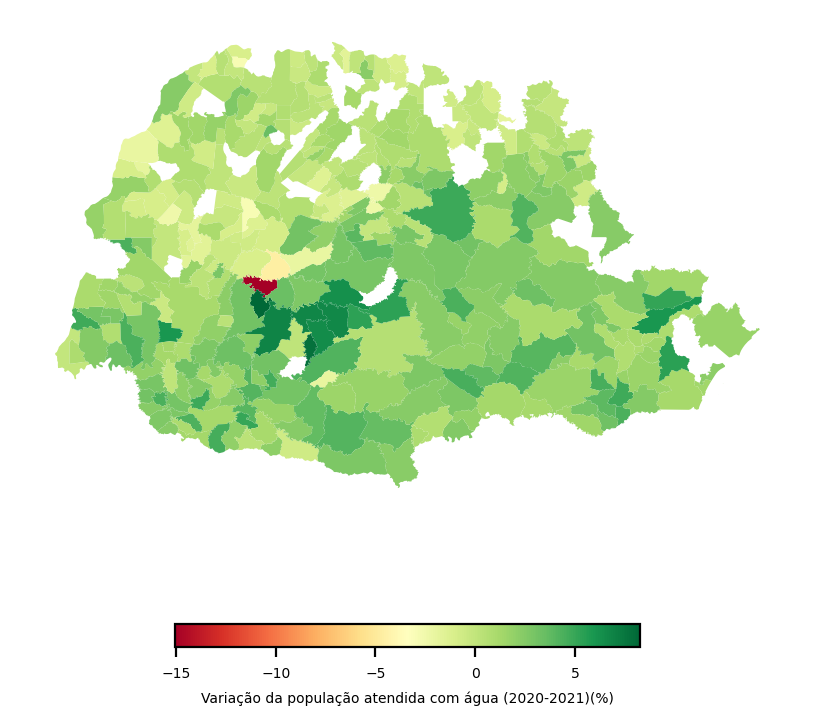

In [22]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
muni_atendimento.plot(
    column="variação",
    cmap="RdYlGn",
    legend=True,
    legend_kwds={
        "label": "Variação da população atendida com água (2020-2021)(%)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

#ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
ax.axis("off")

#plt.savefig('graficos/mapa_muni.jpeg', bbox_inches='tight')

In [208]:
populacao_total[[2021]]

,Ano de Referência,2021
Código do Município,Município,
410020,Adrianópolis,5797.0
410030,Agudos do Sul,9567.0
410040,Almirante Tamandaré,121420.0
410045,Altamira do Paraná,1429.0
410050,Altônia,22293.0
...,...,...
412860,Verê,7094.0
412862,Alto Paraíso,2630.0
412865,Virmond,4051.0


In [217]:
indice_cobertura_agua_2021 = pop_atendida_agua[[2021]] / populacao_total[[2021]] * 100

In [218]:
indice_cobertura_agua_2021

,Ano de Referência,2021
Código do Município,Município,
410020,Adrianópolis,69.604968
410030,Agudos do Sul,62.642417
410040,Almirante Tamandaré,99.989293
410045,Altamira do Paraná,99.930021
410050,Altônia,85.273404
...,...,...
412860,Verê,81.660558
412862,Alto Paraíso,99.961977
412865,Virmond,69.365589


In [223]:
indice_cobertura_agua_2021['grupo'] = indice_cobertura_agua_2021[2021].apply(lambda x: '70%' if x < 70 else r'70% a 90%' if x <= 89 else r'90% a 98%' if x < 99 else '99%' if x >= 99 else 'erro')

In [224]:
muni_cobertura = muni.merge(indice_cobertura_agua_2021.reset_index(), how="left", left_on="code_muni", right_on='Código do Município')

In [221]:
from matplotlib.colors import ListedColormap
colors = ["khaki", "#a1dab4", "#41b6c4", "#2c7fb8", "#253494"]
my_cmap = ListedColormap(colors, name="my_cmap")

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(-54.949713980750005,
 -47.69371950425,
 -26.926002461750002,
 -22.330632435250013)

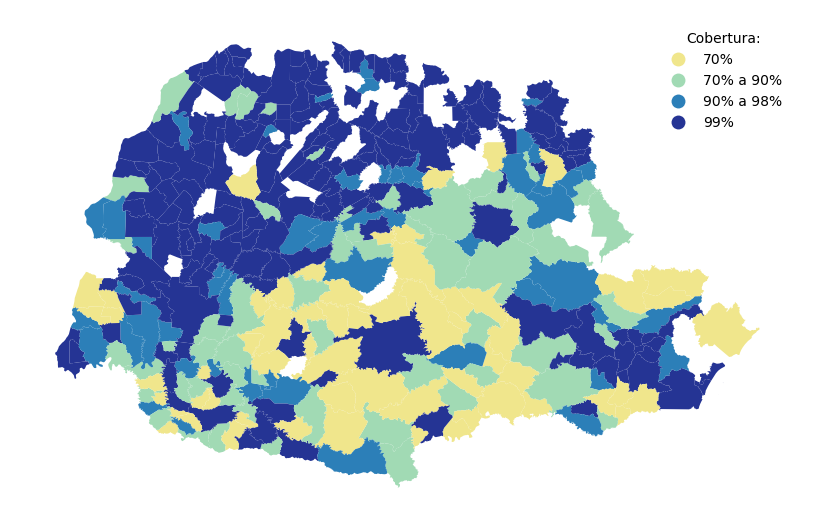

In [225]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
muni_cobertura.plot(
    column='grupo',
    cmap=my_cmap,
    legend=True,
    legend_kwds={
    'markerscale':0.5,
    'frameon':True,
    #'shadow':True,
    #'framealpha':1,
    'edgecolor':'white',
    'title':'Cobertura:',
    },
    ax=ax,
)

#ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
ax.axis("off")

#plt.savefig('graficos/mapa_muni.jpeg', bbox_inches='tight')

In [ ]:
cobertura_agua.sort_values(by=2021, ascending=False, inplace=True)

In [ ]:
cobertura_agua[cobertura_agua[2021] > 99].count()

Ano de Referência
2020         175
2021         175
diferença    175
dtype: int64

In [ ]:
pop_atendida_agua[pop_atendida_agua['variação'] < 0]

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
411740,Ourizona,3424,3422,-0.06,-2
412020,Porto Rico,2555,2553,-0.08,-2
410910,Guaporema,2240,2238,-0.09,-2
411710,Nova Londrina,13198,13186,-0.09,-12
410200,Assis Chateaubriand,33336,33302,-0.10,-34
...,...,...,...,...,...
410337,Brasilândia do Sul,2584,2520,-2.48,-64
411220,Janiópolis,5094,4947,-2.89,-147
411130,Itaúna do Sul,2780,2699,-2.91,-81


In [ ]:
cobertura_agua_total

,total
Ano de Referência,
2020,95.22
2021,95.64


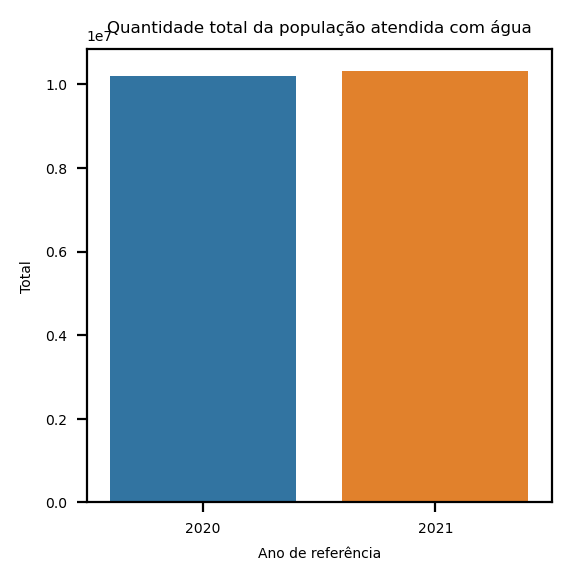

In [ ]:
barra_total(pop_atendida_agua, 'Quantidade total da população atendida com água')

### Cobertura de abastecimento de água de água

In [200]:
#cobertura de abastecimento de água
populacao_total = pd.crosstab([snis_filtrada['Código do Município'], snis_filtrada['Município']], snis_filtrada['Ano de Referência'], snis_filtrada['POP_TOT - População total do município do ano de referência (Fonte: IBGE):'], aggfunc='sum')


#pop_atendida_agua['variação'] = round((pop_atendida_agua[2021] - pop_atendida_agua[2020]) *100 / pop_atendida_agua[2020], 2)
#pop_atendida_agua['variação nominal'] = pop_atendida_agua[2021] - pop_atendida_agua[2020]
#pop_atendida_agua = pop_atendida_agua.sort_values(by='variação', ascending=False)


In [ ]:
populacao_total.reset_index(inplace=True)

In [ ]:
populacao_total[(populacao_total['Município'] == 'Diamante do Sul')]

Ano de Referência,Código do Município,Município,2020,2021
87,410712,Diamante do Sul,3424.0,3409.0


In [ ]:
pop_atendida_agua = pop_atendida_agua = pd.crosstab([snis_filtrada['Código do Município'], snis_filtrada['Município']], snis_filtrada['Ano de Referência'], snis_filtrada['AG001 - População total atendida com abastecimento de água'], aggfunc='sum')

In [ ]:
cobertura_agua = pop_atendida_agua / populacao_total
cobertura_agua = round(cobertura_agua * 100, 2)

In [ ]:
cobertura_agua.sort_values(by=2021, ascending=False)

,Ano de Referência,2020,2021
Código do Município,Município,,
410690,Curitiba,100.00,100.00
411915,Pinhais,100.00,100.00
410760,Faxinal,99.99,99.99
410550,Cianorte,99.99,99.99
412710,Telêmaco Borba,99.99,99.99
...,...,...,...
412120,Quitandinha,40.39,41.60
410130,Antônio Olinto,37.59,38.08
410680,Cruz Machado,37.02,37.84


In [ ]:
#variação
cobertura_agua_total

,total
Ano de Referência,
2020,95.22
2021,95.64


In [ ]:
#cobertura menor em 2021
cobertura_agua[cobertura_agua[2021] < cobertura_agua[2020]]

,Ano de Referência,2020,2021
Código do Município,Município,,
410045,Altamira do Paraná,99.94,99.93
410300,Boa Esperança,99.98,99.97
410347,Cafezal do Sul,99.98,99.97
410425,Campo Magro,84.44,84.00
410920,Guaraci,94.58,94.28
411065,Iracema do Oeste,99.96,99.95
411650,Nova Aliança do Ivaí,88.33,87.63
412790,Tuneiras do Oeste,68.70,68.69
412830,Uniflor,89.44,89.36


In [ ]:
cobertura_agua['diferença'] = cobertura_agua[2021] - cobertura_agua[2020]

In [ ]:
#municipios com maior aumento percentual de cobertura de água
cobertura_agua.sort_values(by='diferença', ascending=False)

,Ano de Referência,2020,2021,diferença
Código do Município,Município,,,
411345,Lindoeste,86.63,93.92,7.29
411727,Nova Tebas,81.68,87.24,5.56
410445,Cantagalo,82.78,88.06,5.28
410712,Diamante do Sul,55.84,60.72,4.88
411620,Morretes,93.03,97.81,4.78
...,...,...,...,...
412830,Uniflor,89.44,89.36,-0.08
410920,Guaraci,94.58,94.28,-0.30
410425,Campo Magro,84.44,84.00,-0.44


In [ ]:
populacao_total

,Ano de Referência,2020,2021
Código do Município,Município,,
410020,Adrianópolis,5857.0,5797.0
410030,Agudos do Sul,9470.0,9567.0
410040,Almirante Tamandaré,120041.0,121420.0
410045,Altamira do Paraná,1682.0,1429.0
410050,Altônia,22176.0,22293.0
...,...,...,...
412862,Alto Paraíso,2685.0,2630.0
412865,Virmond,4022.0,4051.0
412870,Vitorino,6859.0,6879.0


In [ ]:
((pop_atendida_agua[2021].sum() - pop_atendida_agua[2020].sum()) / pop_atendida_agua[2020].sum()) * 100

1.1587862783490221

In [ ]:
cobertura_agua_total = round(pd.DataFrame({'total':pop_atendida_agua.sum() / populacao_total[2021].sum()})*100,2)


In [ ]:
cobertura_agua_total.T

Ano de Referência,2020,2021
total,95.22,96.32


In [ ]:
cobertura_agua_media_nacional_2021 = 84.2
cobertura_agua_media_parana_2021 = 97.7

Text(0.5, 0, 'Ano de referência')

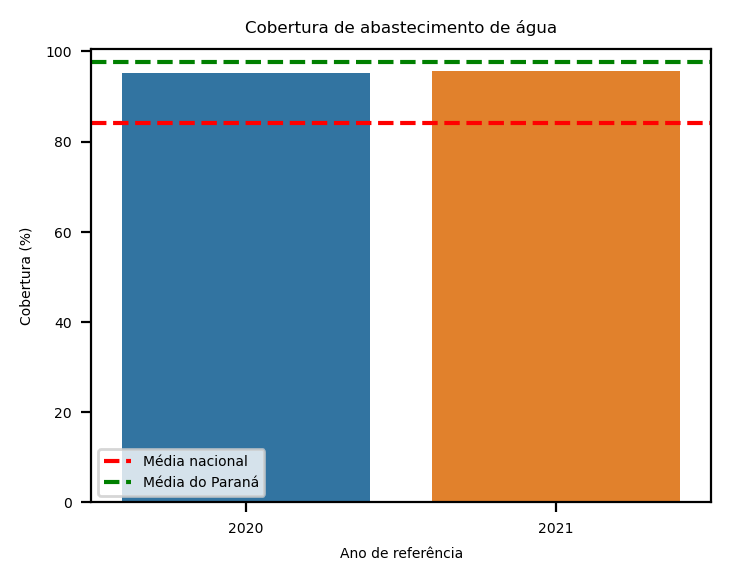

In [ ]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)
sns.barplot(data=cobertura_agua_total.T, ax=ax)
ax.axhline(cobertura_agua_media_nacional_2021, color='red', linestyle='--', label='Média nacional')
ax.axhline(cobertura_agua_media_parana_2021, color='green', linestyle='--', label='Média do Paraná')
ax.legend()
ax.set_title('Cobertura de abastecimento de água')
ax.set_ylabel('Cobertura (%)')
ax.set_xlabel('Ano de referência')


### Ligações Ativas

In [ ]:
ligacoes_ativas = pd.crosstab([snis_filtrada['Código do Município'], snis_filtrada['Município']], snis_filtrada['Ano de Referência'], snis_filtrada['AG002 - Quantidade de ligações ativas de água'], aggfunc='sum')

ligacoes_ativas['variação'] = round((ligacoes_ativas[2021] - ligacoes_ativas[2020]) *100 / ligacoes_ativas[2020], 2)
ligacoes_ativas['variação nominal'] = ligacoes_ativas[2021] - ligacoes_ativas[2020]
ligacoes_ativas = ligacoes_ativas.sort_values(by='variação', ascending=False)


In [ ]:
ligacoes_ativas.sort_values(by='variação', ascending=False)

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
412020,Porto Rico,1783,2098,17.67,315
412870,Vitorino,2671,2963,10.93,292
410790,Floresta,4213,4617,9.59,404
410712,Diamante do Sul,630,686,8.89,56
412865,Virmond,851,912,7.17,61
...,...,...,...,...,...
412830,Uniflor,774,779,0.65,5
410920,Guaraci,1874,1885,0.59,11
410780,Floraí,2327,2335,0.34,8


In [ ]:
ligacoes_ativas = pd.DataFrame(ligacoes_ativas.reset_index())

In [ ]:
muni_ligacoes = muni.merge(ligacoes_ativas, how="left", left_on="code_muni", right_on='Código do Município')

In [ ]:
muni_ligacoes.head()

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,Código do Município,Município,2020,2021,variação,variação nominal
0,410010,Abatiá,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-50.22465 -23.22603, -50.22826...",NaN,NaN,NaN,NaN,NaN,NaN
1,410020,Adrianópolis,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-48.99969 -24.63712, -49.00061...",410020.0,Adrianópolis,1333.0,1354.0,1.58,21.0
2,410030,Agudos Do Sul,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.30433 -25.94769, -49.30541...",410030.0,Agudos do Sul,1876.0,1949.0,3.89,73.0
3,410040,Almirante Tamandaré,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.28261 -25.22827, -49.26277...",410040.0,Almirante Tamandaré,31524.0,32278.0,2.39,754.0
4,410045,Altamira Do Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.81511 -24.71726, -52.80153...",410045.0,Altamira do Paraná,1024.0,1034.0,0.98,10.0


C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(-54.949713980750005,
 -47.69371950425,
 -26.926002461750002,
 -22.330632435250013)

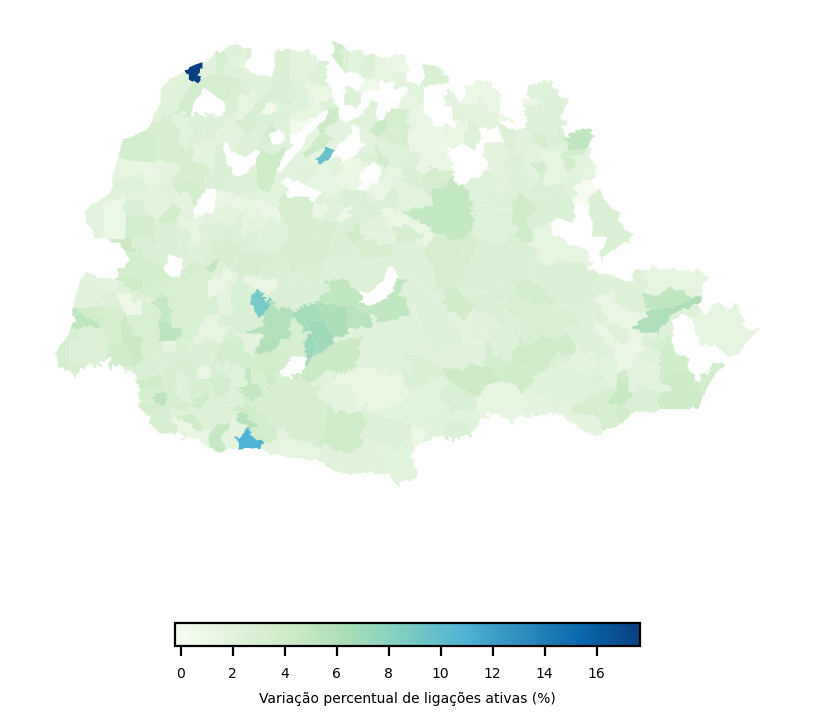

In [ ]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
muni_ligacoes.plot(
    column="variação",
    cmap="GnBu",
    legend=True,
    legend_kwds={
        "label": "Variação percentual de ligações ativas (%)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

#ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
ax.axis("off")

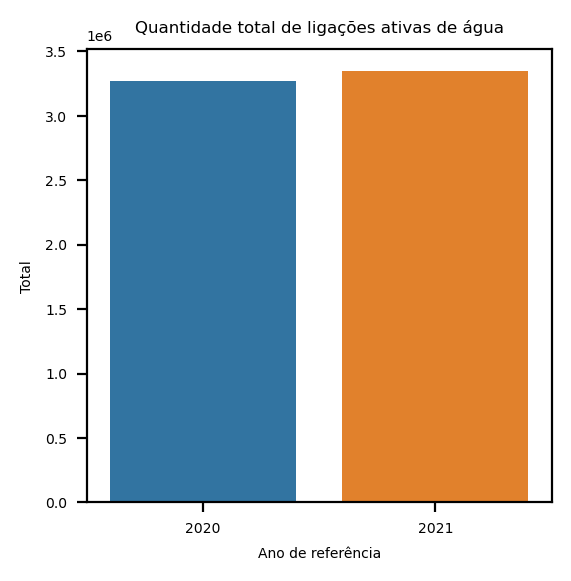

In [ ]:
barra_total(ligacoes_ativas, 'Quantidade total de ligações ativas de água')

In [32]:
regioes = geobr.read_meso_region(code_meso='PR',year=2020)
regioes['code_meso'] = regioes['code_meso'].astype(int)

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [33]:
regioes['code_meso'] = regioes['code_meso'].apply(lambda x: str(x)[2:])

In [34]:
regioes_cod = pd.read_excel('dados/RELATORIO_DTB_BRASIL_DISTRITO.xls')

In [35]:
regioes_cod = regioes_cod[regioes_cod['UF']==41]


In [36]:
regioes_cod.drop_duplicates(subset=['Código Município Completo'], inplace=True)

In [37]:
regioes_cod = regioes_cod[['Código Município Completo', 'Nome_Município', 'Mesorregião Geográfica', 'Nome_Mesorregião']]

In [38]:
regioes_cod['Código Município Completo'] = regioes_cod['Código Município Completo'].apply(lambda x: str(x)[:-1])

In [39]:
regioes_cod['Código Município Completo'] = regioes_cod['Código Município Completo'].astype(int)

In [40]:
regioes_cobertura = regioes_cod.merge(indice_cobertura_agua_2021.reset_index(), how="left", left_on="Código Município Completo", right_on='Código do Município')

NameError: name 'indice_cobertura_agua_2021' is not defined

In [ ]:
regioes_cobertura = regioes_cobertura.merge(regioes, how="left", left_on="Nome_Mesorregião", right_on='name_meso')

In [ ]:
#merge populacao total
regioes_cobertura = regioes_cobertura.merge(populacao_total, how="left", left_on="Código do Município", right_on='Código do Município', suffixes=('_cobertura', '_populacao'))

In [ ]:
regioes_cobertura.dropna(subset='2021_cobertura', inplace=True)

In [ ]:
regioes_cobertura['grupo_tamanho'] = regioes_cobertura['2021_populacao'].apply(lambda x: '<10' if x <= 10000 else '10 a 20' if x <= 20000 else '20 a 50' if x <= 50000 else '50 a 100' if x <= 100000 else '100 a 500' if x <=500000 else '>500' if x > 500000 else 'sem dados')

In [ ]:
regioes_cobertura['grupo_tamanho'] = pd.Categorical(regioes_cobertura['grupo_tamanho'], categories=['<10', '10 a 20', '20 a 50', '50 a 100', '100 a 500', '>500'])

In [ ]:
pd.crosstab(regioes_cobertura['Nome_Mesorregião'], regioes_cobertura['grupo_tamanho'], regioes_cobertura['2021_cobertura'],aggfunc='mean').fillna('-')

In [ ]:
regioes_cobertura.groupby(['Nome_Mesorregião'])[['2021_cobertura']].mean().sort_values('2021_cobertura',ascending=False)

,2021_cobertura
Nome_Mesorregião,
Centro Ocidental Paranaense,98.209272
Noroeste Paranaense,97.601098
Norte Pioneiro Paranaense,94.658886
Norte Central Paranaense,94.126403
Oeste Paranaense,92.143828
Centro Oriental Paranaense,88.669149
Metropolitana de Curitiba,86.283877
Sudoeste Paranaense,80.251948
Centro-Sul Paranaense,70.810596


In [ ]:
regioes_cobertura[['Código do Município', 'Município_cobertura','name_meso']]

In [ ]:
regioes_cobertura.groupby(['Nome_Mesorregião'])

### Ligações ativas

In [ ]:
ligacoes_regioes = ligacoes_regioes.groupby('Nome_Mesorregião').sum()

In [ ]:
ligacoes_regioes.drop(axis=1, columns=['Código do Município', 'Código Município Completo', 'variação nominal', 'variação', 'Mesorregião Geográfica'], inplace=True)

In [ ]:
ligacoes_regioes

,2020,2021
Nome_Mesorregião,,
Centro Ocidental Paranaense,120650,123732
Centro Oriental Paranaense,225365,231926
Centro-Sul Paranaense,141912,145764
Metropolitana de Curitiba,1067416,1085834
Noroeste Paranaense,241712,248643
Norte Central Paranaense,657925,670880
Norte Pioneiro Paranaense,151265,154614
Oeste Paranaense,410740,422977
Sudeste Paranaense,96917,99118


In [ ]:
regioes_cod.drop_duplicates(subset=['Nome_Mesorregião']).sort_values(by='Nome_Mesorregião')

,Código Município Completo,Nome_Município,Mesorregião Geográfica,Nome_Mesorregião
7415,410045,Altamira do Paraná,2,Centro Ocidental Paranaense
7448,410160,Arapoti,5,Centro Oriental Paranaense
7487,410304,Boa Ventura de São Roque,8,Centro-Sul Paranaense
7411,410020,Adrianópolis,10,Metropolitana de Curitiba
7416,412862,Alto Paraíso,1,Noroeste Paranaense
7427,410080,Alvorada do Sul,3,Norte Central Paranaense
7410,410010,Abatiá,4,Norte Pioneiro Paranaense
7434,410105,Anahy,6,Oeste Paranaense
7441,410130,Antônio Olinto,9,Sudeste Paranaense
7431,410100,Ampére,7,Sudoeste Paranaense


In [ ]:
regioes_cod.drop_duplicates(subset=['Nome_Mesorregião']).sort_values(by='Nome_Mesorregião')['Mesorregião Geográfica']

7415     2
7448     5
7487     8
7411    10
7416     1
7427     3
7410     4
7434     6
7441     9
7431     7
Name: Mesorregião Geográfica, dtype: int64

In [ ]:
regioes['code_meso'] = regioes['code_meso'].astype(int)

In [ ]:
ligacoes_regioes.reset_index(inplace=True)

In [ ]:
ligacoes_regioes = ligacoes_regioes.merge(regioes, how="left", left_on="Nome_Mesorregião", right_on='name_meso')

In [ ]:
ligacoes_regioes['variação'] = round((ligacoes_regioes[2021] - ligacoes_regioes[2020]) *100 / ligacoes_regioes[2020], 2)
ligacoes_regioes['variação nominal'] = ligacoes_regioes[2021] - ligacoes_regioes[2020]
ligacoes_regioes = ligacoes_regioes.sort_values(by='variação', ascending=False)


In [ ]:
#TODO: Calcular os valores agregados por região e criar novo df somente com as regiões para plotar o gráfico 

In [ ]:
regioes_variacao = regioes
regioes_variacao['variação'] = ligacoes_regioes.sort_values(by='code_meso', ascending=True)['variação']

In [ ]:
regioes_variacao

,code_state,abbrev_state,name_state,code_meso,name_meso,geometry,variação
0,41.0,PR,Paraná,1,Noroeste Paranaense,"MULTIPOLYGON (((-53.71491 -23.28338, -53.70560...",2.55
1,41.0,PR,Paraná,2,Centro Ocidental Paranaense,"MULTIPOLYGON (((-53.13159 -24.10287, -53.11812...",2.91
2,41.0,PR,Paraná,3,Norte Central Paranaense,"MULTIPOLYGON (((-52.03689 -23.02207, -52.03063...",2.71
3,41.0,PR,Paraná,4,Norte Pioneiro Paranaense,"MULTIPOLYGON (((-50.96340 -23.30342, -50.96196...",1.73
4,41.0,PR,Paraná,5,Centro Oriental Paranaense,"MULTIPOLYGON (((-51.09801 -24.32583, -51.09618...",2.87
5,41.0,PR,Paraná,6,Oeste Paranaense,"MULTIPOLYGON (((-54.32688 -24.65950, -54.31882...",1.97
6,41.0,PR,Paraná,7,Sudoeste Paranaense,"MULTIPOLYGON (((-53.84979 -25.69078, -53.84360...",2.21
7,41.0,PR,Paraná,8,Centro-Sul Paranaense,"MULTIPOLYGON (((-52.84000 -25.27354, -52.83849...",2.98
8,41.0,PR,Paraná,9,Sudeste Paranaense,"MULTIPOLYGON (((-51.13312 -25.50081, -51.13928...",2.27
9,41.0,PR,Paraná,10,Metropolitana De Curitiba,"MULTIPOLYGON (((-48.40736 -25.84270, -48.40920...",3.28


C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


<AxesSubplot:>

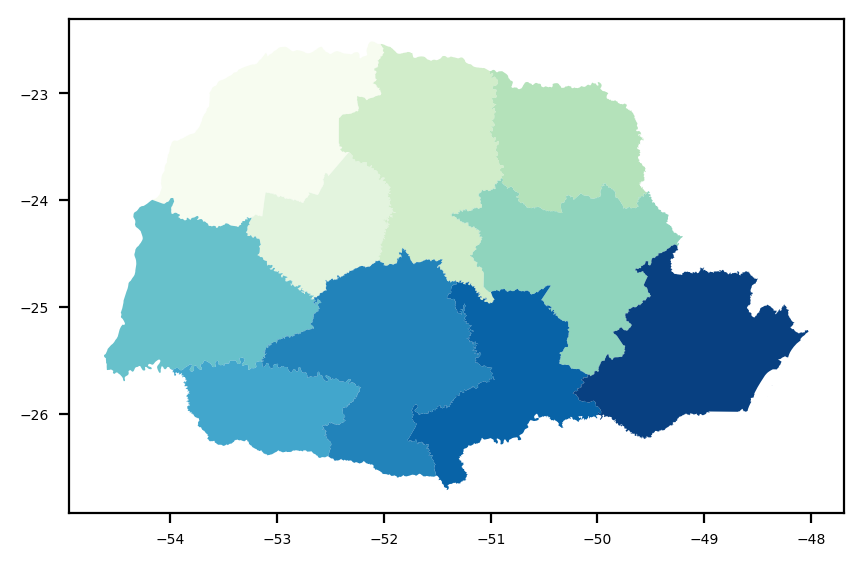

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
regioes.plot(
    #column="variação",
    cmap="GnBu",
    legend=True,
    legend_kwds={
        "label": "Variação percentual de ligações ativas (%)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(-54.94992271235, -47.69370956465, -26.927145011350003, -22.30663889365001)

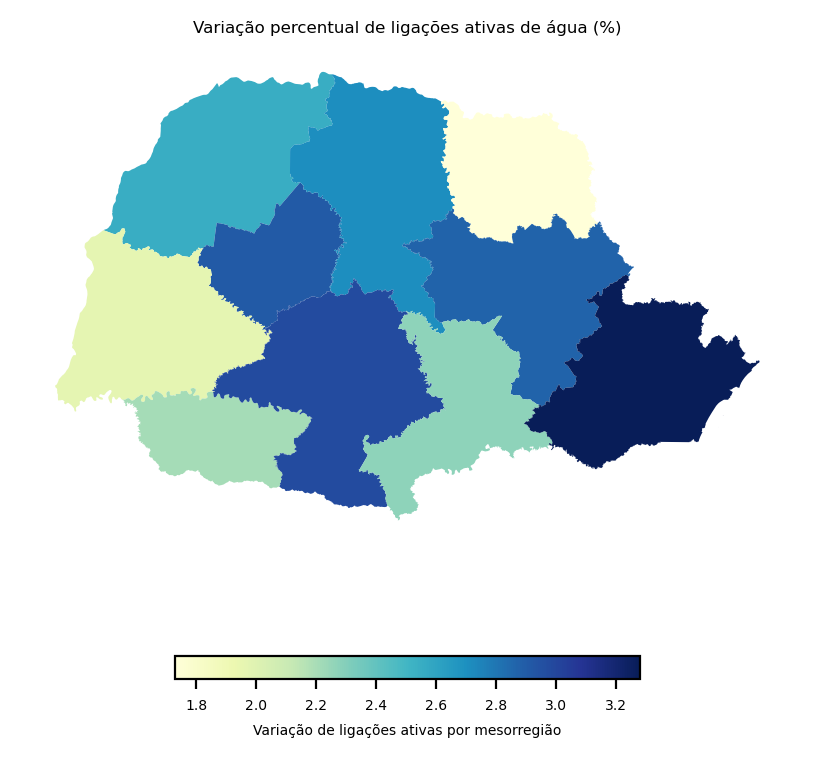

In [ ]:
#plot map of ligacoes_regioes

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
regioes_variacao.plot(
    column="variação",
    cmap="YlGnBu",
    legend=True,
    legend_kwds={
        "label": "Variação de ligações ativas por mesorregião",
        "orientation": "horizontal",
        "shrink": 0.6
    },
    ax=ax,
)
ax.set_title("Variação percentual de ligações ativas de água (%)")

ax.axis("off")



### Volume de água produzido

In [ ]:
#variação percentual AG006 - Volume de água produzido

muni_agua_produzida = variacao(snis_filtrada, 'AG006 - Volume de água produzido')

In [ ]:
snis[snis['Município'].isin(['Espigão Alto do Iguaçu','Piraquara','Porto União'])][['Município','Tipo de serviço']]

,Município,Tipo de serviço
192,Espigão Alto do Iguaçu,Água
193,Espigão Alto do Iguaçu,Água
468,Piraquara,Água e Esgoto
469,Piraquara,Água e Esgoto
688,Porto União,Água e Esgoto
689,Porto União,Água e Esgoto


C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


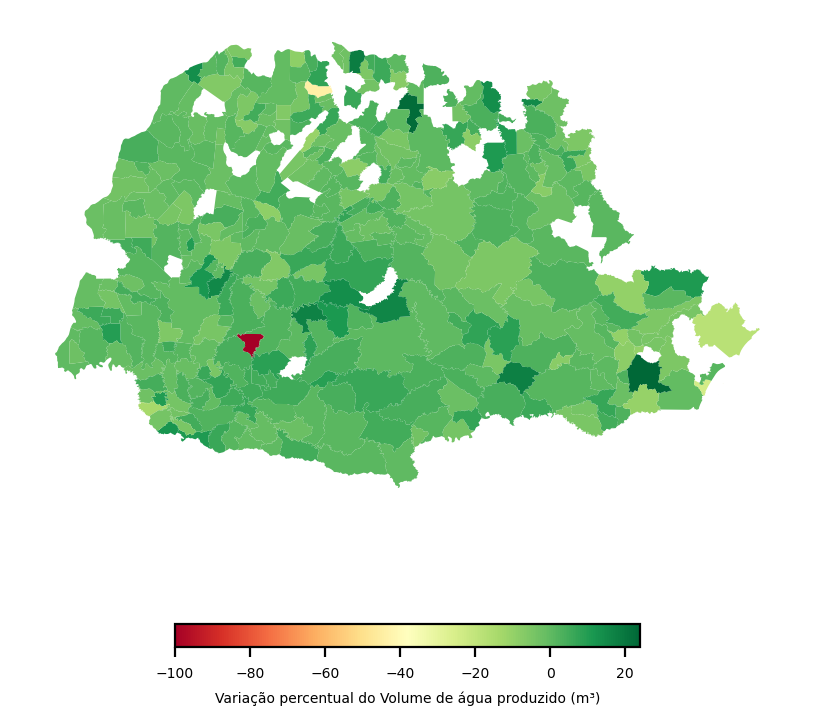

In [ ]:
mapa_muni(muni_agua_produzida, 'Variação percentual do Volume de água produzido (m³)')

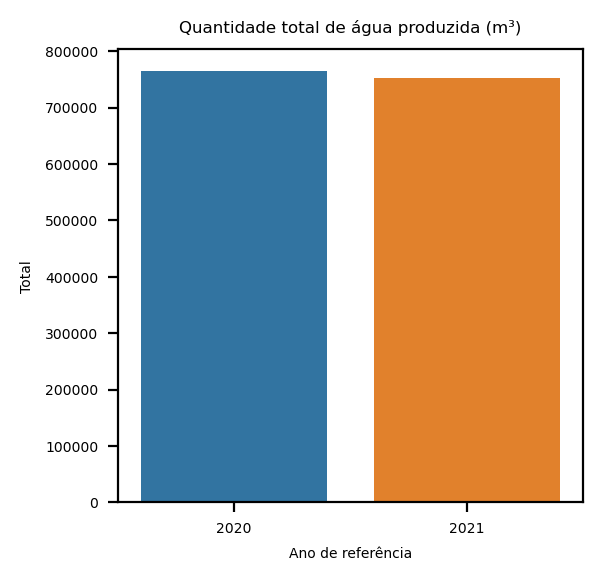

In [ ]:
barra_total(muni_agua_produzida, 'Quantidade total de água produzida (m³)')

In [ ]:
muni_agua_produzida

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
412550,São José dos Pinhais,28809.89,35700.05,23.92,6890.16
410370,Cambé,1300.25,1595.47,22.70,295.22
412450,Santo Inácio,446.29,528.62,18.45,82.33
412510,São João do Triunfo,212.19,249.38,17.53,37.19
411545,Marquinho,80.43,93.97,16.83,13.54
...,...,...,...,...,...
411570,Matinhos,3128.37,2372.36,-24.17,-756.01
410670,Cruzeiro do Sul,196.93,109.96,-44.16,-86.97
410754,Espigão Alto do Iguaçu,41.03,0.00,-100.00,-41.03


In [ ]:
#Problema não está no tipo de serviço

### AG011 - Volume de água faturado

In [ ]:
muni_agua_faturado = variacao(snis_filtrada, 'AG011 - Volume de água faturado')

In [ ]:
muni_agua_faturado

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
412870,Vitorino,312.00,373.67,19.77,61.67
412550,São José dos Pinhais,25165.14,29785.66,18.36,4620.52
412796,Turvo,308.50,361.75,17.26,53.25
412020,Porto Rico,284.57,323.67,13.74,39.10
411810,Paranacity,600.85,665.56,10.77,64.71
...,...,...,...,...,...
410895,Guamiranga,165.06,155.35,-5.88,-9.71
411650,Nova Aliança do Ivaí,73.91,69.31,-6.22,-4.60
410690,Curitiba,193467.42,179333.09,-7.31,-14134.33


C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


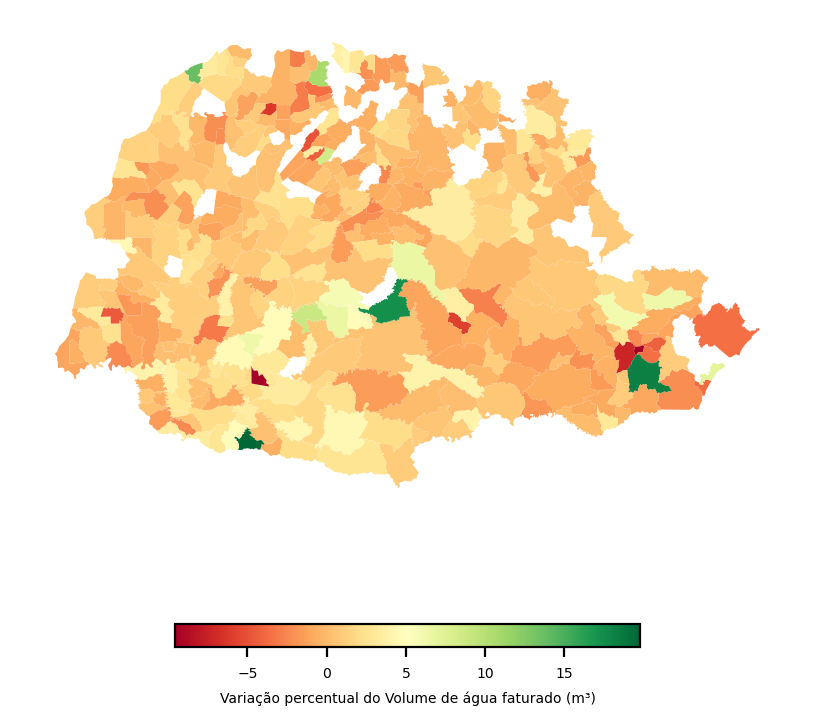

In [ ]:
mapa_muni(muni_agua_faturado, 'Variação percentual do Volume de água faturado (m³)')

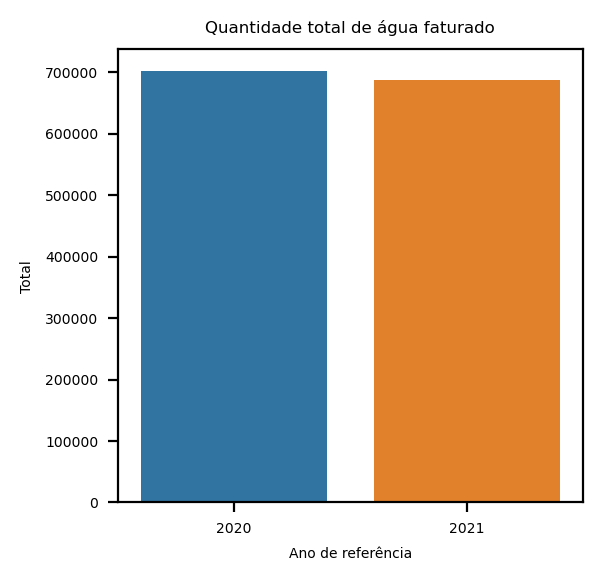

In [ ]:
barra_total(muni_agua_faturado, 'Quantidade total de água faturado')

### AG010 - Volume de água consumido

In [ ]:
muni_agua_consumida = variacao(snis_filtrada, 'AG010 - Volume de água consumido')

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


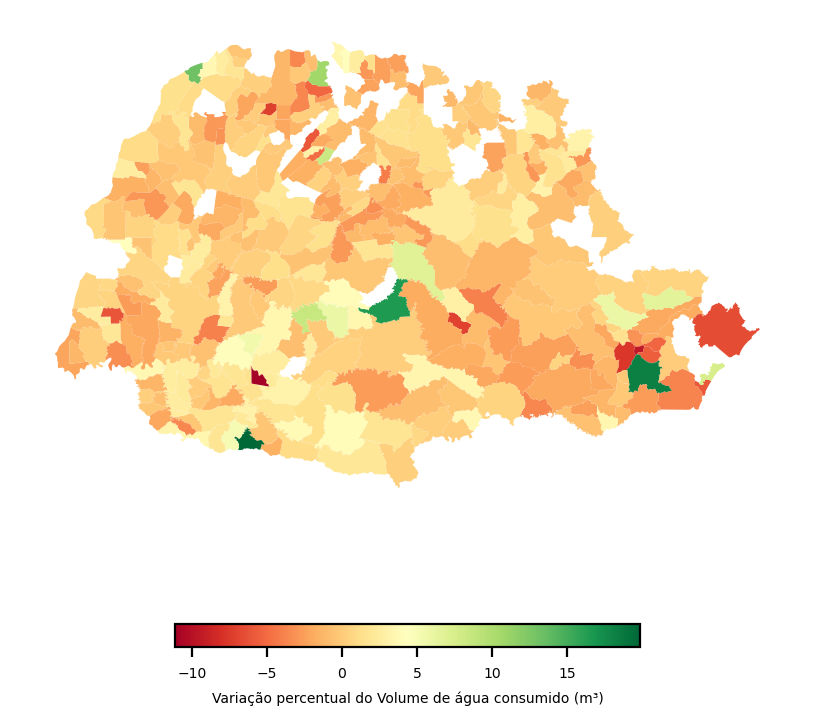

In [ ]:
mapa_muni(muni_agua_consumida, 'Variação percentual do Volume de água consumido (m³)')

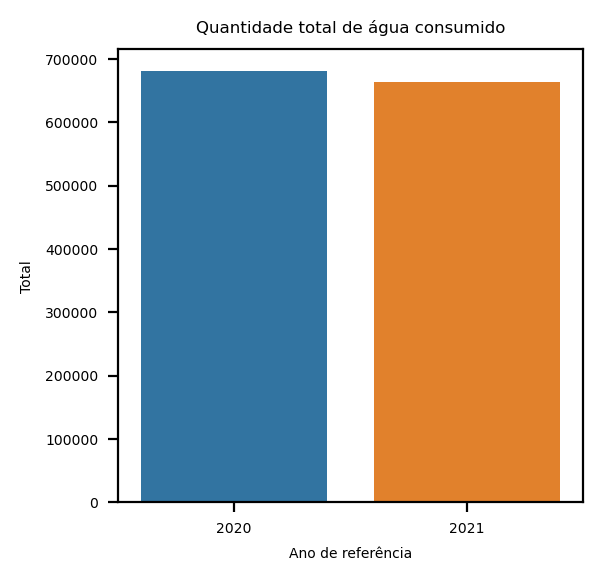

In [ ]:
barra_total(muni_agua_consumida, 'Quantidade total de água consumido')

### QD002 - Quantidades de paralisações no sistema de distribuição de água

In [ ]:
muni_paralisacao = variacao(snis_filtrada, 'QD002 - Quantidades de paralisações no sistema de distribuição de água')

In [ ]:
#não é possivel fazer mapa_muni

In [ ]:
muni_paralisacao.sum()

Ano de Referência
2020                0.0
2021                0.0
variação            0.0
variação nominal    0.0
dtype: float64

### Incidência das análises de turbidez fora do padrão

In [ ]:
muni_turbidez = variacao(snis_filtrada, 'IN076 - Incidência das análises de turbidez fora do padrão')

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\matplotlib\colors.py:1254: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


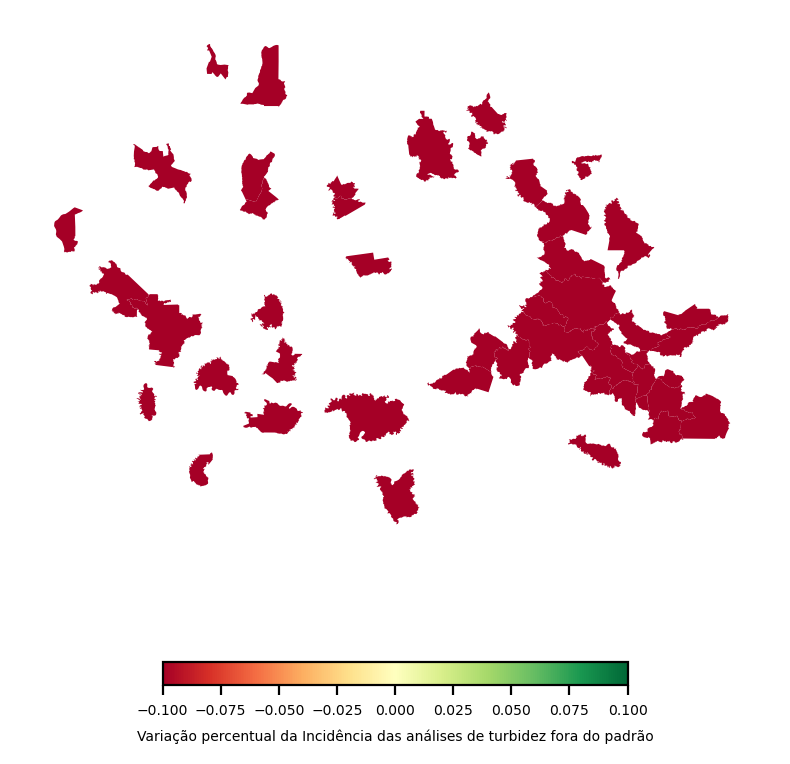

In [ ]:
mapa_muni(muni_turbidez, 'Variação percentual da Incidência das análises de turbidez fora do padrão')

In [ ]:
muni_turbidez

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
410020,Adrianópolis,0.0,0.27,inf,0.27
410580,Colombo,0.0,0.09,inf,0.09
411915,Pinhais,0.0,0.29,inf,0.29
411850,Pato Branco,0.0,0.43,inf,0.43
411790,Palotina,0.0,0.11,inf,0.11
...,...,...,...,...,...
412862,Alto Paraíso,0.0,0.00,NaN,0.00
412865,Virmond,0.0,0.00,NaN,0.00
412870,Vitorino,0.0,0.00,NaN,0.00


In [ ]:
sanepar_turbidez = pd.read_excel('dados/sanepar-turbidez.xlsx')

In [ ]:
sanepar_turbidez = sanepar_turbidez[:-1]

In [ ]:
sanepar_turbidez

In [ ]:
pd.crosstab(sanepar_turbidez['Município'], sanepar_turbidez['Ano de Referência'], values=sanepar_turbidez['IN076 - Incidência das análises de turbidez fora do padrão'], aggfunc='sum').sort_values(by=2021, ascending=False)

Ano de Referência,2020,2021
Município,,
Cruzeiro do Sul,0.00,1.23
Pato Branco,0.00,0.43
Bom Sucesso,0.00,0.39
Curitiba,0.23,0.39
Araucária,0.06,0.39
...,...,...
Guaraniaçu,0.00,0.00
Guaraci,0.00,0.00
Guaporema,0.00,0.00


In [ ]:
sanepar_turbidez[sanepar_turbidez['Ano de Referência'] == 2020].sum()

Código do Município                                                                                           141951527
Município                                                             AdrianópolisAgudos do SulAlmirante TamandaréAl...
Estado                                                                PRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPRPR...
Ano de Referência                                                                                                696900
Código do Prestador                                                                                         14168805000
Prestador                                                             Companhia de Saneamento do ParanáCompanhia de ...
Sigla do Prestador                                                    SANEPARSANEPARSANEPARSANEPARSANEPARSANEPARSANE...
Abrangência                                                           RegionalRegionalRegionalRegionalRegionalRegion...
Tipo de serviço                         

In [ ]:
153 / 250250 * 100 #2020

0.06113886113886114

In [ ]:
104 / 234818 * 100 #2021

0.044289620046163415

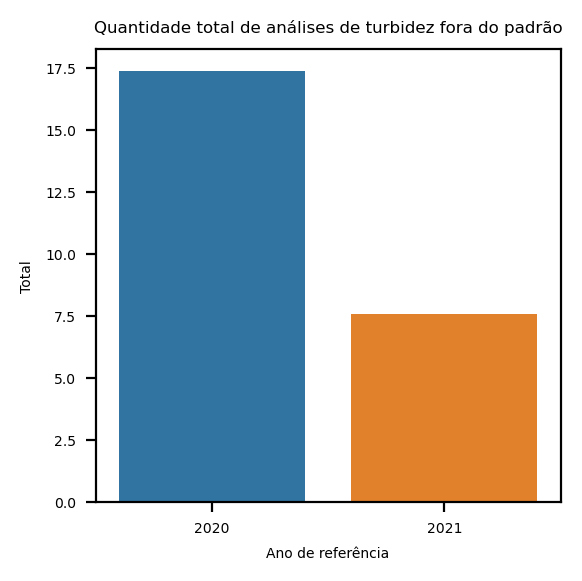

In [ ]:
barra_total(muni_turbidez, 'Quantidade total de análises de turbidez fora do padrão')

### Quantidade de amostras para coliformes totais com resultados fora do padrão

In [ ]:
muni_coliformes = variacao(snis_filtrada, 'QD027 - Quantidade de amostras para coliformes totais com resultados fora do padrão')

In [ ]:
muni_coliformes.sum()

Ano de Referência
2020                178.0
2021                376.0
variação              inf
variação nominal    198.0
dtype: float64

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\matplotlib\colors.py:1254: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


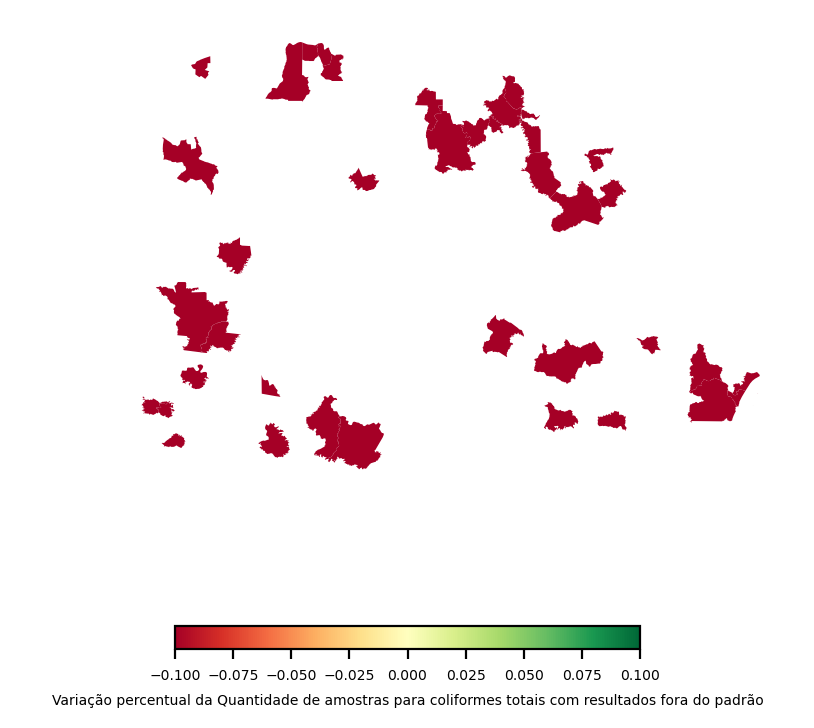

In [ ]:
mapa_muni(muni_coliformes, 'Variação percentual da Quantidade de amostras para coliformes totais com resultados fora do padrão')

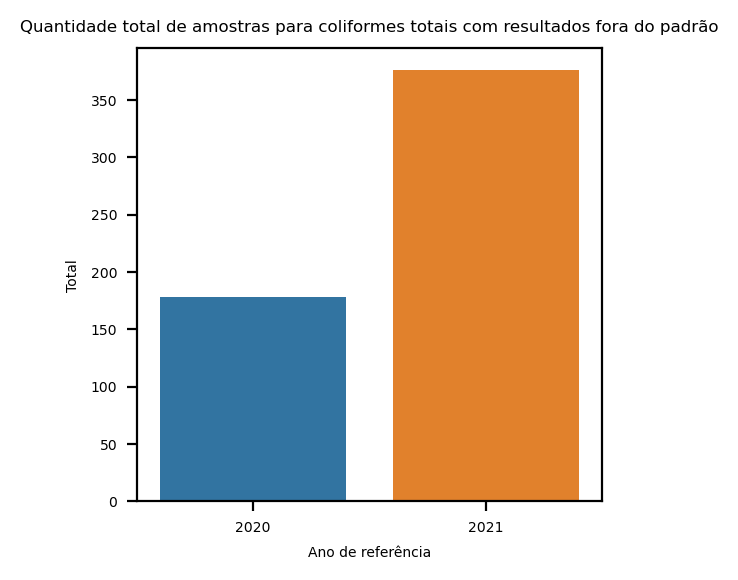

In [ ]:
barra_total(muni_coliformes, 'Quantidade total de amostras para coliformes totais com resultados fora do padrão')

In [ ]:
sanepar_coliformes = pd.read_excel('dados/sanepar-coliformes.xlsx')
sanepar_coliformes = sanepar_coliformes[:-1]

In [ ]:
sanepar_coliformes.head()

,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,QD026 - Quantidade de amostras para coliformes totais (analisadas),QD027 - Quantidade de amostras para coliformes totais com resultados fora do padrão,QD028 - Quantidade mínima de amostras para coliformes totais (obrigatórias),IN084 - Incidência das análises de coliformes totais fora do padrão,IN085 - Índice de conformidade da quantidade de amostras - coliformes totais
0,410020,Adrianópolis,PR,2021,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água,Sociedade de economia mista com administração ...,408,0,408,0.0,100.0
1,410020,Adrianópolis,PR,2020,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água,Sociedade de economia mista com administração ...,541,0,541,0.0,100.0
2,410030,Agudos do Sul,PR,2021,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,230,0,230,0.0,100.0
3,410030,Agudos do Sul,PR,2020,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,250,0,250,0.0,100.0
4,410040,Almirante Tamandaré,PR,2021,41069000,Companhia de Saneamento do Paraná,SANEPAR,Regional,Água e Esgoto,Sociedade de economia mista com administração ...,1390,0,1390,0.0,100.0


In [ ]:
muni_coliformes[muni_coliformes[2021] != 0]

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
411373,Luiziana,0,2,inf,2
411695,Nova Esperança do Sudoeste,0,4,inf,4
412000,Porecatu,0,2,inf,2
411980,Planalto,0,1,inf,1
411960,Pitanga,0,8,inf,8
...,...,...,...,...,...
411900,Pérola D Oeste,3,1,-66.67,-2
411995,Pontal do Paraná,3,1,-66.67,-2
411770,Palmeira,3,1,-66.67,-2


In [ ]:
pd.crosstab(sanepar_coliformes['Município'], sanepar_coliformes['Ano de Referência'], values=sanepar_coliformes['QD027 - Quantidade de amostras para coliformes totais com resultados fora do padrão'], aggfunc='sum').sort_values(by=2021, ascending=False)

Ano de Referência,2020,2021
Município,,
Cascavel,16,90
Curitiba,0,19
Apucarana,0,14
Faxinal,0,13
Londrina,7,10
...,...,...
Itaúna do Sul,0,0
Ivatuba,0,0
Ivaté,0,0


In [ ]:
pd.crosstab(sanepar_coliformes['Município'], sanepar_coliformes['Ano de Referência'], values=sanepar_coliformes['QD026 - Quantidade de amostras para coliformes totais (analisadas)'], aggfunc='sum').sort_values(by=2021, ascending=False).sum()

Ano de Referência
2020    264078
2021    227102
dtype: int64

In [ ]:
sanepar_coliformes[sanepar_coliformes['IN085 - Índice de conformidade da quantidade de amostras - coliformes totais'] != 100]

,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Abrangência,Tipo de serviço,Natureza jurídica,QD026 - Quantidade de amostras para coliformes totais (analisadas),QD027 - Quantidade de amostras para coliformes totais com resultados fora do padrão,QD028 - Quantidade mínima de amostras para coliformes totais (obrigatórias),IN084 - Incidência das análises de coliformes totais fora do padrão,IN085 - Índice de conformidade da quantidade de amostras - coliformes totais


In [ ]:
178 / 264078 * 100 #2020

0.0674043275092965

In [ ]:
((0.1655643719562135 - 0.0674043275092965 )/ 0.0674043275092965 ) * 100

145.62869785085928

In [ ]:
376 / 227102 * 100 #2021

0.1655643719562135

### Índice de conformidade da quantidade de amostras - cloro residual
    

In [ ]:
muni_cloro = variacao(snis_filtrada, 'IN079 - Índice de conformidade da quantidade de amostras - cloro residual')

In [ ]:
muni_cloro[muni_cloro[2020] != 100]

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,


C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


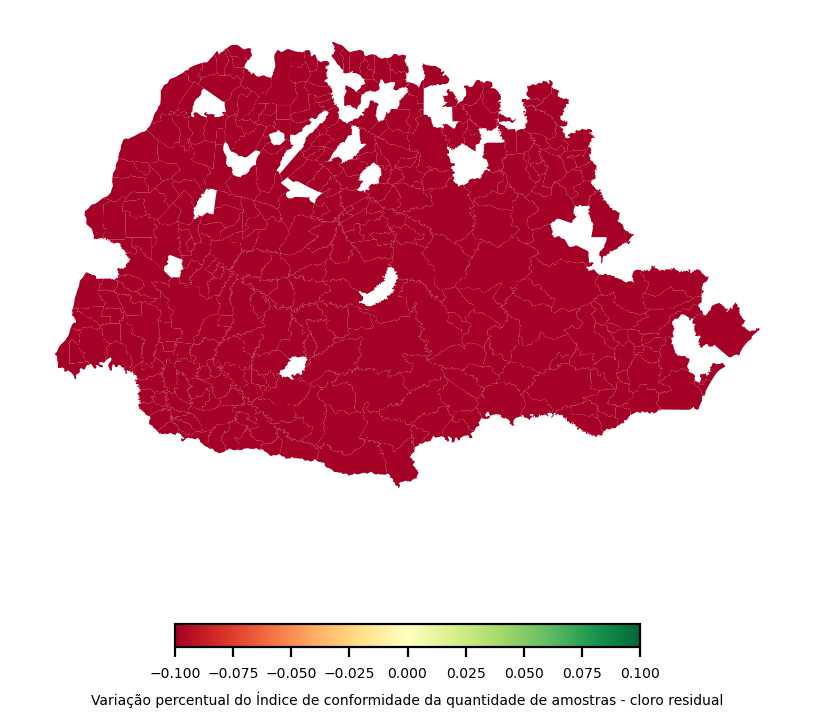

In [ ]:
mapa_muni(muni_cloro, 'Variação percentual do Índice de conformidade da quantidade de amostras - cloro residual')

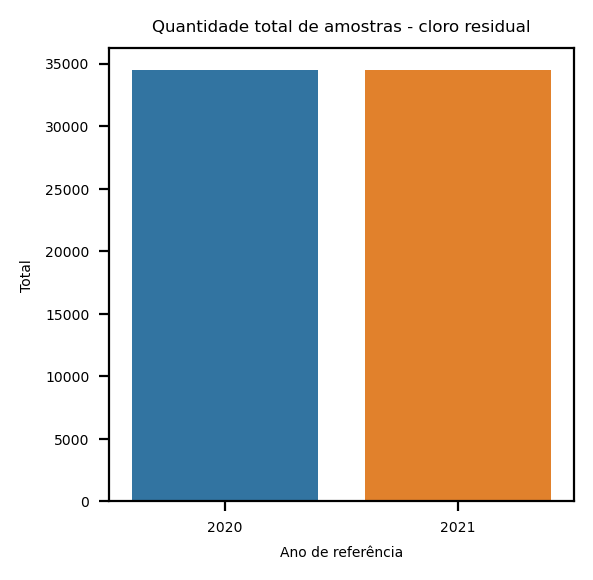

In [ ]:
barra_total(muni_cloro, 'Quantidade total de amostras - cloro residual')

### População total atendida com esgotamento sanitário
    

In [24]:
muni_atendida_esgoto = variacao(snis_filtrada, 'ES001 - População total atendida com esgotamento sanitário')

In [70]:
indice_cobertura_esgoto = snis_filtrada[['Ano de Referência','Código do Município','Município','ES001 - População total atendida com esgotamento sanitário','POP_TOT - População total do município do ano de referência (Fonte: IBGE):']]

In [72]:
indice_cobertura_esgoto.dropna(subset='ES001 - População total atendida com esgotamento sanitário', inplace=True)

C:\Users\est.matheus.brasil\AppData\Local\Temp\ipykernel_14348\3095496930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_cobertura_esgoto.dropna(subset='ES001 - População total atendida com esgotamento sanitário', inplace=True)


In [42]:
#merge populacao total
regioes_cobertur_esgoto['grupo_tamanho'] = regioes_cobertur_esgoto['POP_TOT - População total do município do ano de referência (Fonte: IBGE):'].apply(lambda x: '<10' if x <= 10000 else '10 a 20' if x <= 20000 else '20 a 50' if x <= 50000 else '50 a 100' if x <= 100000 else '100 a 500' if x <=500000 else '>500' if x > 500000 else 'sem dados')
regioes_cobertur_esgoto['grupo_tamanho'] = pd.Categorical(regioes_cobertur_esgoto['grupo_tamanho'], categories=['<10', '10 a 20', '20 a 50', '50 a 100', '100 a 500', '>500'])


In [76]:
indice_cobertura_esgoto['Cobertura_esgoto'] = indice_cobertura_esgoto['ES001 - População total atendida com esgotamento sanitário'] / indice_cobertura_esgoto['POP_TOT - População total do município do ano de referência (Fonte: IBGE):'] * 100

C:\Users\est.matheus.brasil\AppData\Local\Temp\ipykernel_14348\2094833188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indice_cobertura_esgoto['Cobertura_esgoto'] = indice_cobertura_esgoto['ES001 - População total atendida com esgotamento sanitário'] / indice_cobertura_esgoto['POP_TOT - População total do município do ano de referência (Fonte: IBGE):'] * 100


In [78]:
indice_cobertura_esgoto_2021 = indice_cobertura_esgoto[indice_cobertura_esgoto['Ano de Referência'] == 2021]

In [82]:
muni

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry
0,410010,Abatiá,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-50.22465 -23.22603, -50.22826..."
1,410020,Adrianópolis,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-48.99969 -24.63712, -49.00061..."
2,410030,Agudos Do Sul,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.30433 -25.94769, -49.30541..."
3,410040,Almirante Tamandaré,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.28261 -25.22827, -49.26277..."
4,410045,Altamira Do Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.81511 -24.71726, -52.80153..."
...,...,...,...,...,...,...,...,...
394,412862,Alto Paraíso,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-53.75199 -23.37324, -53.74475..."
395,412863,Doutor Ulysses,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.25710 -24.42878, -49.25259..."
396,412865,Virmond,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.22111 -25.26374, -52.21895..."
397,412870,Vitorino,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.82010 -26.15020, -52.81527..."


In [83]:
cobertura_esgoto = muni.merge(indice_cobertura_esgoto_2021.reset_index(), how="left", left_on="code_muni", right_on='Código do Município')
#regioes_cobertur_esgoto = regioes_cobertur_esgoto.merge(regioes, how="left", left_on="Nome_Mesorregião", right_on='name_meso')

In [44]:
regioes_cobertur_esgoto.dropna(subset='Município', inplace=True)

In [ ]:
pd.crosstab(regioes_cobertur_esgoto['Nome_Mesorregião'], regioes_cobertur_esgoto['grupo_tamanho'], regioes_cobertur_esgoto['Cobertura_esgoto']*100,aggfunc='mean').fillna('-')


In [ ]:
regioes_esgoto = regioes_cobertur_esgoto.groupby(['Nome_Mesorregião'])[['ES001 - População total atendida com esgotamento sanitário','POP_TOT - População total do município do ano de referência (Fonte: IBGE):']].sum()

In [ ]:
regioes_esgoto['cobertura'] = regioes_esgoto['ES001 - População total atendida com esgotamento sanitário'] / regioes_esgoto['POP_TOT - População total do município do ano de referência (Fonte: IBGE):'] * 100

In [ ]:
regioes_esgoto

In [61]:
populacao_total = pd.crosstab([snis_filtrada['Código do Município'], snis_filtrada['Município']], snis_filtrada['Ano de Referência'], snis_filtrada['POP_TOT - População total do município do ano de referência (Fonte: IBGE):'], aggfunc='sum')

In [62]:
populacao_total

,Ano de Referência,2020,2021
Código do Município,Município,,
410020,Adrianópolis,5857.0,5797.0
410030,Agudos do Sul,9470.0,9567.0
410040,Almirante Tamandaré,120041.0,121420.0
410045,Altamira do Paraná,1682.0,1429.0
410050,Altônia,22176.0,22293.0
...,...,...,...
412860,Verê,7174.0,7094.0
412862,Alto Paraíso,2685.0,2630.0
412865,Virmond,4022.0,4051.0


In [63]:
snis_filtrada.groupby('Ano de Referência')['ES001 - População total atendida com esgotamento sanitário'].sum()

Ano de Referência
2020    8091885.0
2021    8268726.0
Name: ES001 - População total atendida com esgotamento sanitário, dtype: float64

In [64]:
indice_cobertura_esgoto = muni_atendida_esgoto[[2020, 2021]] / populacao_total[[2020, 2021]] * 100

In [65]:
muni_atendida_esgoto[[2020, 2021]]

,Ano de Referência,2020,2021
Código do Município,Município,,
412796,Turvo,318.0,892.0
410090,Amaporã,1181.0,2901.0
412610,São Tomé,1767.0,3199.0
411930,Pinhão,7711.0,11832.0
412510,São João do Triunfo,1226.0,1688.0
...,...,...,...
412830,Uniflor,0.0,0.0
412860,Verê,0.0,0.0
412865,Virmond,0.0,0.0


In [ ]:
populacao_total[[2020, 2021]]

,Ano de Referência,2020,2021
Código do Município,Município,,
410020,Adrianópolis,5857.0,5797.0
410030,Agudos do Sul,9470.0,9567.0
410040,Almirante Tamandaré,120041.0,121420.0
410045,Altamira do Paraná,1682.0,1429.0
410050,Altônia,22176.0,22293.0
...,...,...,...
412862,Alto Paraíso,2685.0,2630.0
412865,Virmond,4022.0,4051.0
412870,Vitorino,6859.0,6879.0


In [174]:
muni_indice_esgoto = muni.merge(indice_cobertura_esgoto, how="left", left_on="code_muni", right_on='Código do Município')

In [187]:
muni_indice_esgoto_2021 = muni_indice_esgoto[muni_indice_esgoto['Ano de Referência'] == 2021].dropna(subset=['Município'])

In [226]:
muni_indice_esgoto_2021

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,Ano de Referência,Código do Município,Município,ES001 - População total atendida com esgotamento sanitário,POP_TOT - População total do município do ano de referência (Fonte: IBGE):,Cobertura_esgoto,grupo
2,410030,Agudos Do Sul,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.30433 -25.94769, -49.30541...",2021.0,410030.0,Agudos do Sul,1904.0,9567.0,19.901746,10
4,410040,Almirante Tamandaré,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.28261 -25.22827, -49.26277...",2021.0,410040.0,Almirante Tamandaré,72158.0,121420.0,59.428430,100 a 500
6,410045,Altamira Do Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.81511 -24.71726, -52.80153...",2021.0,410045.0,Altamira do Paraná,846.0,1429.0,59.202239,10
8,410050,Altônia,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-53.90248 -23.79581, -53.88653...",2021.0,410050.0,Altônia,11574.0,22293.0,51.917642,20 a 50
10,410060,Alto Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.30021 -22.90666, -52.29299...",2021.0,410060.0,Alto Paraná,9852.0,14945.0,65.921713,10 a 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,412850,Wenceslau Braz,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.77555 -23.73809, -49.76985...",2021.0,412850.0,Wenceslau Braz,11781.0,19358.0,60.858560,10 a 20
589,412853,Ventania,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-50.26849 -23.95491, -50.26880...",2021.0,412853.0,Ventania,3119.0,12267.0,25.425940,10 a 20
591,412855,Vera Cruz Do Oeste,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-54.03577 -24.89143, -54.03013...",2021.0,412855.0,Vera Cruz do Oeste,6741.0,8389.0,80.355227,10
594,412862,Alto Paraíso,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-53.75199 -23.37324, -53.74475...",2021.0,412862.0,Alto Paraíso,754.0,2630.0,28.669202,10


In [229]:
muni_indice_esgoto_2021['grupo'] = muni_indice_esgoto_2021['Cobertura_esgoto'].apply(lambda x: '70%' if x < 70 else r'70% a 90%' if x <= 89 else r'90% a 98%' if x < 99 else '99%' if x >= 99 else 'erro')
muni_indice_esgoto_2021['grupo'] = pd.Categorical(muni_indice_esgoto_2021['grupo'], ordered=True, categories=['70%', r'70% a 90%', r'90% a 98%', '99%'])


In [230]:
muni_indice_esgoto_2021

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,Ano de Referência,Código do Município,Município,ES001 - População total atendida com esgotamento sanitário,POP_TOT - População total do município do ano de referência (Fonte: IBGE):,Cobertura_esgoto,grupo
2,410030,Agudos Do Sul,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.30433 -25.94769, -49.30541...",2021.0,410030.0,Agudos do Sul,1904.0,9567.0,19.901746,70%
4,410040,Almirante Tamandaré,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.28261 -25.22827, -49.26277...",2021.0,410040.0,Almirante Tamandaré,72158.0,121420.0,59.428430,70%
6,410045,Altamira Do Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.81511 -24.71726, -52.80153...",2021.0,410045.0,Altamira do Paraná,846.0,1429.0,59.202239,70%
8,410050,Altônia,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-53.90248 -23.79581, -53.88653...",2021.0,410050.0,Altônia,11574.0,22293.0,51.917642,70%
10,410060,Alto Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.30021 -22.90666, -52.29299...",2021.0,410060.0,Alto Paraná,9852.0,14945.0,65.921713,70%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,412850,Wenceslau Braz,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.77555 -23.73809, -49.76985...",2021.0,412850.0,Wenceslau Braz,11781.0,19358.0,60.858560,70%
589,412853,Ventania,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-50.26849 -23.95491, -50.26880...",2021.0,412853.0,Ventania,3119.0,12267.0,25.425940,70%
591,412855,Vera Cruz Do Oeste,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-54.03577 -24.89143, -54.03013...",2021.0,412855.0,Vera Cruz do Oeste,6741.0,8389.0,80.355227,70% a 90%
594,412862,Alto Paraíso,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-53.75199 -23.37324, -53.74475...",2021.0,412862.0,Alto Paraíso,754.0,2630.0,28.669202,70%


In [231]:
muni_atendida_esgoto = muni.merge(indice_cobertura_esgoto, how="left", left_on="code_muni", right_on='Código do Município')

In [233]:
from matplotlib.colors import ListedColormap
colors_esgoto = ["#BEE6CE", "#BCFFDB", "#8DFFCD", "#68D89B", "#4F9D69"]
my_cmap_esgoto = ListedColormap(colors_esgoto, name="my_cmap_esgoto")

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(-54.949713980750005,
 -47.69371950425,
 -26.924696907200005,
 -22.358049080800008)

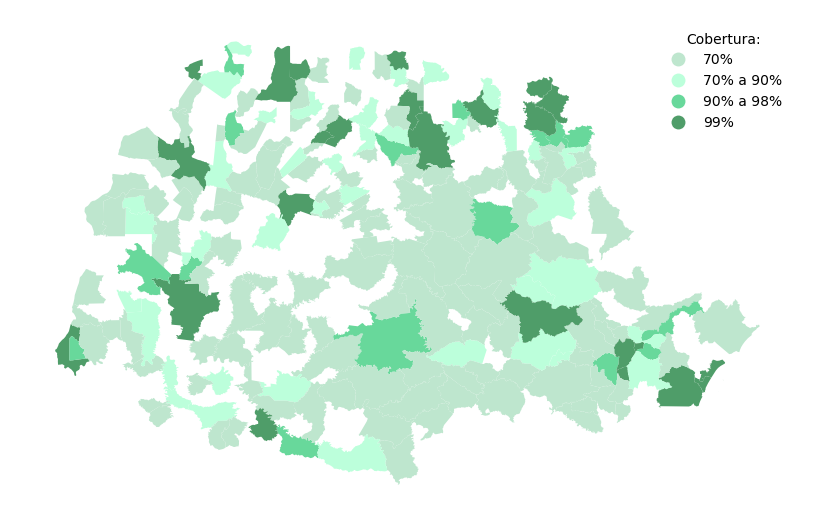

In [234]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
muni_indice_esgoto_2021.plot(
    column='grupo',
    cmap=my_cmap_esgoto,
    legend=True,
    legend_kwds={
    'markerscale':0.5,
    'frameon':True,
    #'shadow':True,
    #'framealpha':1,
    'edgecolor':'white',
    'title':'Cobertura:',
    },
    ax=ax,
)

#ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
ax.axis("off")

#plt.savefig('graficos/mapa_muni.jpeg', bbox_inches='tight')

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(-54.949713980750005,
 -47.69371950425,
 -26.924696907200005,
 -22.358049080800008)

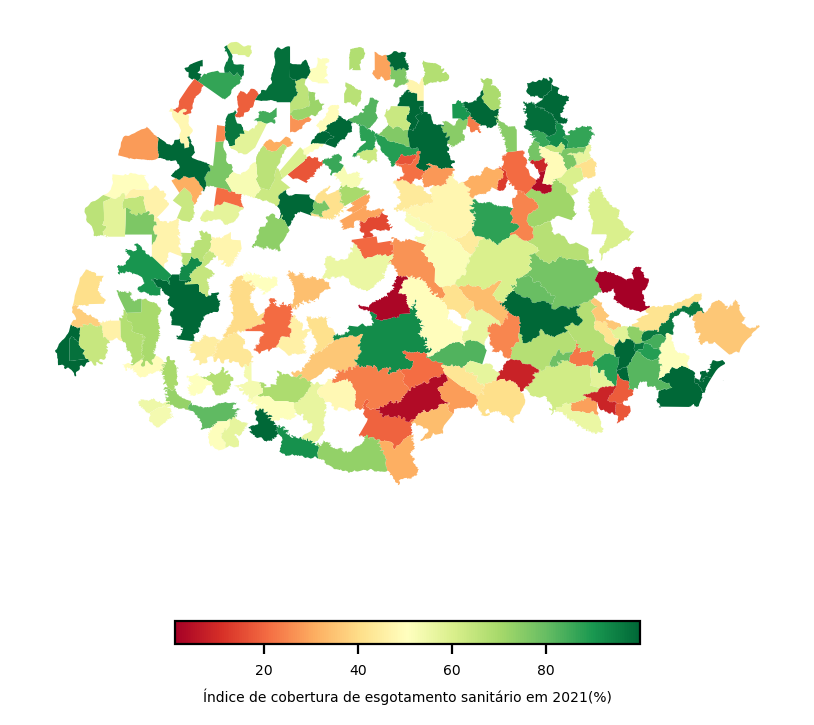

In [161]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
muni_atendida_esgoto[muni_atendida_esgoto['Ano de Referência']==2020].dropna(subset='Ano de Referência').plot(
    column='Cobertura_esgoto',
    cmap="RdYlGn",
    legend=True,
    legend_kwds={
        "label": "Índice de cobertura de esgotamento sanitário em 2021(%)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

#ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
ax.axis("off")

In [ ]:
atendimento_esgoto = muni_atendida_esgoto.set_index('code_muni')

In [ ]:
muni_atendida_esgoto

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,2020,2021,variação,variação nominal
0,410010,Abatiá,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-50.22465 -23.22603, -50.22826...",NaN,NaN,NaN,NaN
1,410020,Adrianópolis,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-48.99969 -24.63712, -49.00061...",0.0,0.0,NaN,0.0
2,410030,Agudos Do Sul,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.30433 -25.94769, -49.30541...",1664.0,1904.0,14.42,240.0
3,410040,Almirante Tamandaré,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.28261 -25.22827, -49.26277...",69630.0,72158.0,3.63,2528.0
4,410045,Altamira Do Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.81511 -24.71726, -52.80153...",855.0,846.0,-1.05,-9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
394,412862,Alto Paraíso,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-53.75199 -23.37324, -53.74475...",745.0,754.0,1.21,9.0
395,412863,Doutor Ulysses,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.25710 -24.42878, -49.25259...",NaN,NaN,NaN,NaN
396,412865,Virmond,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.22111 -25.26374, -52.21895...",0.0,0.0,NaN,0.0
397,412870,Vitorino,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.82010 -26.15020, -52.81527...",0.0,0.0,NaN,0.0


In [ ]:
muni_atendida_esgoto[muni_atendida_esgoto[2021] != 0].dropna(subset=[2021])[[2020, 2021]]

,2020,2021
2,1664.0,1904.0
3,69630.0,72158.0
4,855.0,846.0
5,11111.0,11574.0
6,9771.0,9852.0
...,...,...
390,11603.0,11781.0
391,2944.0,3119.0
392,6447.0,6741.0
394,745.0,754.0


In [ ]:
#filtrar indice de populacao_total por lista

pop_total_reset = populacao_total.reset_index()

In [ ]:
muni_atendida_esgoto[muni_atendida_esgoto[2021] != 0].dropna(subset=[2021])[[2020, 2021]]

,2020,2021
2,1664.0,1904.0
3,69630.0,72158.0
4,855.0,846.0
5,11111.0,11574.0
6,9771.0,9852.0
...,...,...
390,11603.0,11781.0
391,2944.0,3119.0
392,6447.0,6741.0
394,745.0,754.0


In [ ]:
populacao_total['Códi']

,Ano de Referência,2020,2021
Código do Município,Município,,
410020,Adrianópolis,5857.0,5797.0
410030,Agudos do Sul,9470.0,9567.0
410040,Almirante Tamandaré,120041.0,121420.0
410045,Altamira do Paraná,1682.0,1429.0
410050,Altônia,22176.0,22293.0
...,...,...,...
412862,Alto Paraíso,2685.0,2630.0
412865,Virmond,4022.0,4051.0
412870,Vitorino,6859.0,6879.0


In [ ]:
pop_total_reset[pop_total_reset['Código do Município'].isin(muni_atendida_esgoto[muni_atendida_esgoto[2021] != 0].dropna(subset=[2021])['code_muni'].tolist())].sum()

Ano de Referência
Código do Município                                             83109299
Município              Agudos do SulAlmirante TamandaréAltamira do Pa...
2020                                                           9827724.0
2021                                                           9906355.0
dtype: object

In [ ]:
muni_atendida_esgoto[muni_atendida_esgoto[2021] != 0].dropna(subset=[2021])[[2020, 2021]].sum()

2020    8094770.0
2021    8268726.0
dtype: float64

In [ ]:
muni_atendida_esgoto[muni_atendida_esgoto[2021] != 0].dropna(subset=[2021])

,code_muni,name_muni,code_state,abbrev_state,name_state,code_region,name_region,geometry,2020,2021,variação,variação nominal
2,410030,Agudos Do Sul,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.30433 -25.94769, -49.30541...",1664.0,1904.0,14.42,240.0
3,410040,Almirante Tamandaré,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.28261 -25.22827, -49.26277...",69630.0,72158.0,3.63,2528.0
4,410045,Altamira Do Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.81511 -24.71726, -52.80153...",855.0,846.0,-1.05,-9.0
5,410050,Altônia,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-53.90248 -23.79581, -53.88653...",11111.0,11574.0,4.17,463.0
6,410060,Alto Paraná,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-52.30021 -22.90666, -52.29299...",9771.0,9852.0,0.83,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...
390,412850,Wenceslau Braz,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-49.77555 -23.73809, -49.76985...",11603.0,11781.0,1.53,178.0
391,412853,Ventania,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-50.26849 -23.95491, -50.26880...",2944.0,3119.0,5.94,175.0
392,412855,Vera Cruz Do Oeste,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-54.03577 -24.89143, -54.03013...",6447.0,6741.0,4.56,294.0
394,412862,Alto Paraíso,41.0,PR,Paraná,4.0,Sul,"MULTIPOLYGON (((-53.75199 -23.37324, -53.74475...",745.0,754.0,1.21,9.0


In [ ]:
muni_atendida_esgoto[muni_atendida_esgoto[2021] != 0].dropna(subset=[2021])[[2020, 2021]].sum()

2020    8094770.0
2021    8268726.0
dtype: float64

In [ ]:
8.3/8.8

0.9431818181818182

In [ ]:
8268726 / 9906355 * 100

83.46890455672141

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


(-54.949713980750005,
 -47.69371950425,
 -26.924696907200005,
 -22.358049080800008)

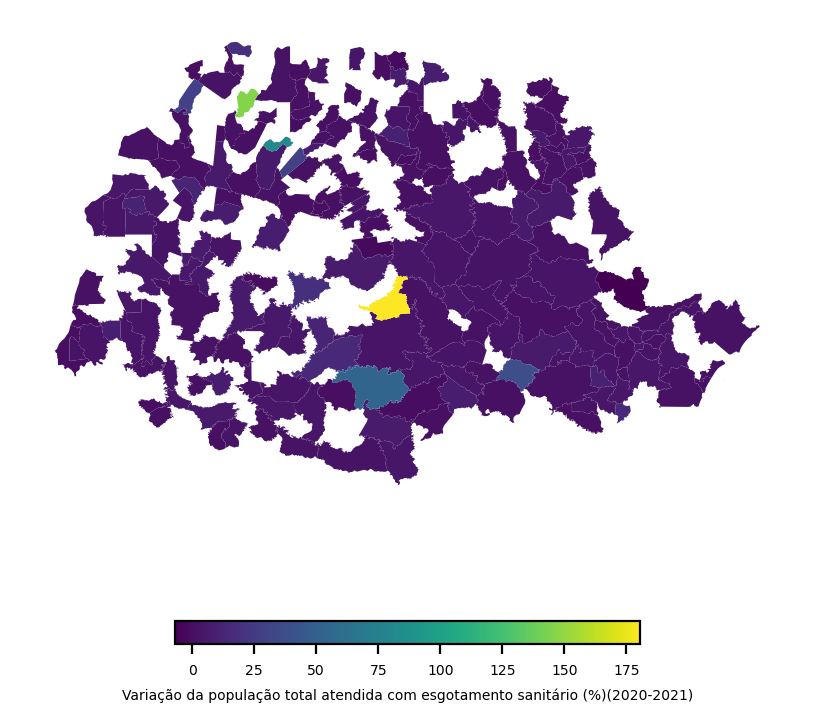

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5), dpi=200)
muni_atendida_esgoto[muni_atendida_esgoto[2021] != 0].dropna(subset=[2021]).plot(
    column='variação',
    cmap="viridis",
    legend=True,
    legend_kwds={
        "label": "Variação da população total atendida com esgotamento sanitário (%)(2020-2021)",
        "orientation": "horizontal",
        "shrink": 0.6,
    },
    ax=ax,
)

#ax.set_title("Life Expectancy at birth, Brazilian States, 2014")
ax.axis("off")

In [ ]:
892/318

2.8050314465408803

In [ ]:
2901 / 1181

2.4563928873835734

In [ ]:
574 + 1720

2294

In [ ]:
muni_atendida_esgoto_filtrado = muni_atendida_esgoto[muni_atendida_esgoto[2021] != 0].dropna(subset=[2021])

In [ ]:
muni_atendida_esgoto_filtrado[muni_atendida_esgoto_filtrado['variação'] < 0]

code_muni           14
name_muni           14
code_state          14
abbrev_state        14
name_state          14
code_region         14
name_region         14
geometry            14
2020                14
2021                14
variação            14
variação nominal    14
dtype: int64

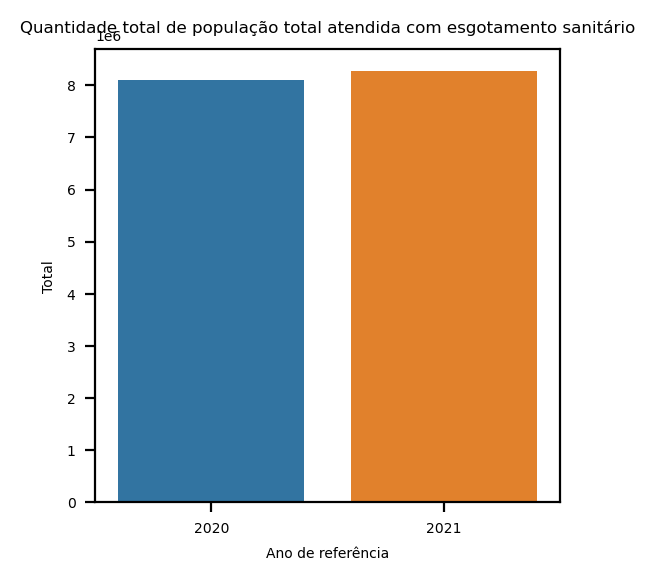

In [ ]:
barra_total(muni_atendida_esgoto, 'Quantidade total de população total atendida com esgotamento sanitário')

In [ ]:
#TODO: Verificar se a ausência de dados está relacionada com o tipo de serviço

### Quantidade de ligações ativas de esgotos
    

In [ ]:
muni_ligacoes_esgoto = variacao(snis_filtrada, 'ES002 - Quantidade de ligações ativas de esgotos')

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


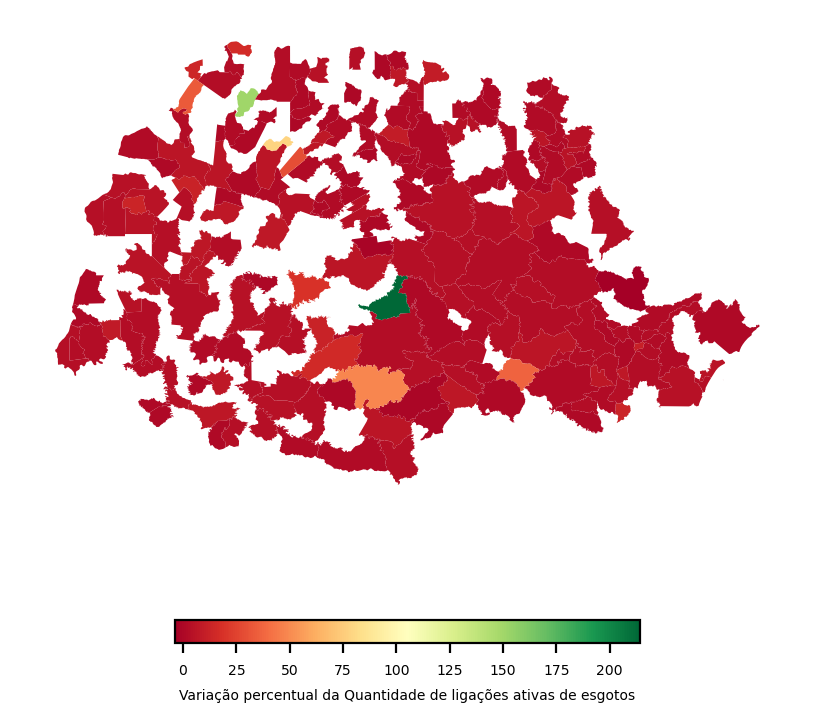

In [ ]:
mapa_muni(muni_ligacoes_esgoto, 'Variação percentual da Quantidade de ligações ativas de esgotos')

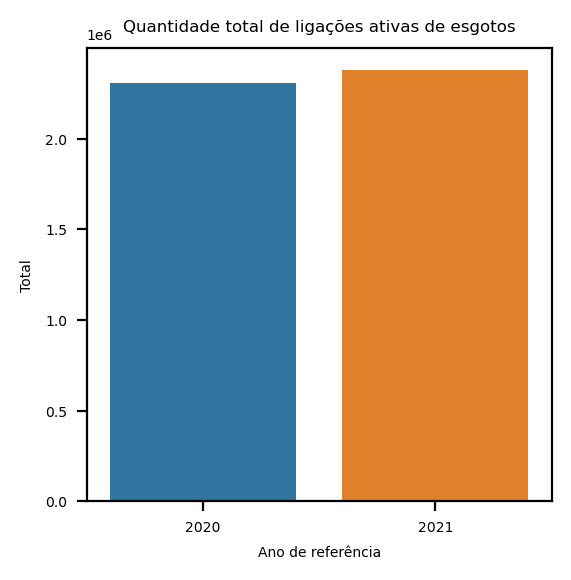

In [ ]:
barra_total(muni_ligacoes_esgoto, 'Quantidade total de ligações ativas de esgotos')

In [ ]:
muni_ligacoes_esgoto

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
412796,Turvo,106.0,333.0,214.15,227.0
410090,Amaporã,356.0,893.0,150.84,537.0
412610,São Tomé,618.0,1101.0,78.16,483.0
411930,Pinhão,2419.0,3598.0,48.74,1179.0
412510,São João do Triunfo,380.0,520.0,36.84,140.0
...,...,...,...,...,...
412788,Tunas do Paraná,0.0,0.0,NaN,0.0
412830,Uniflor,0.0,0.0,NaN,0.0
412860,Verê,0.0,0.0,NaN,0.0


### Volume de esgotos coletado
    

In [ ]:
muni_esgoto_coletado = variacao(snis_filtrada, 'ES005 - Volume de esgotos coletado')

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


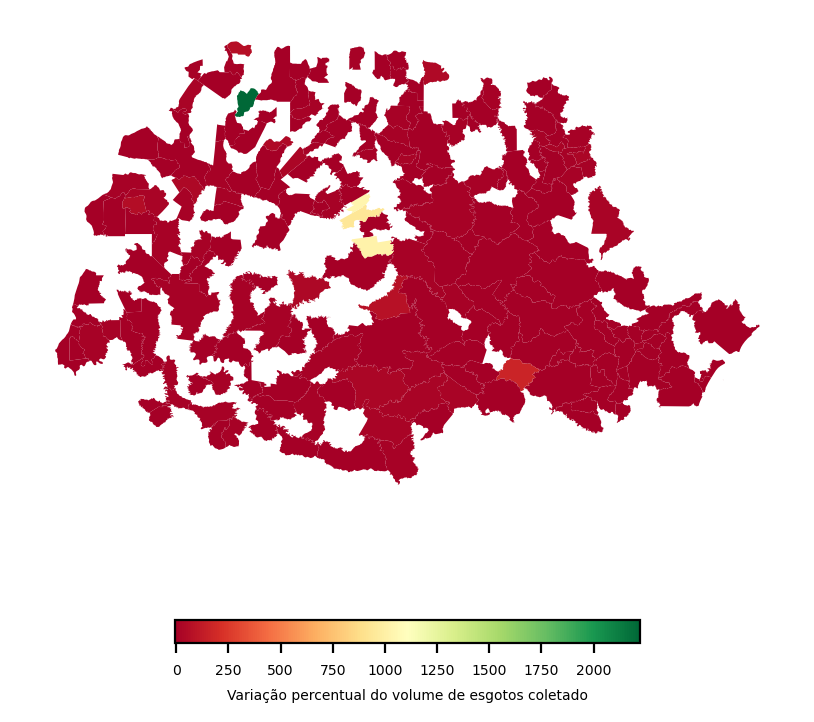

In [ ]:
mapa_muni(muni_esgoto_coletado, 'Variação percentual do volume de esgotos coletado')

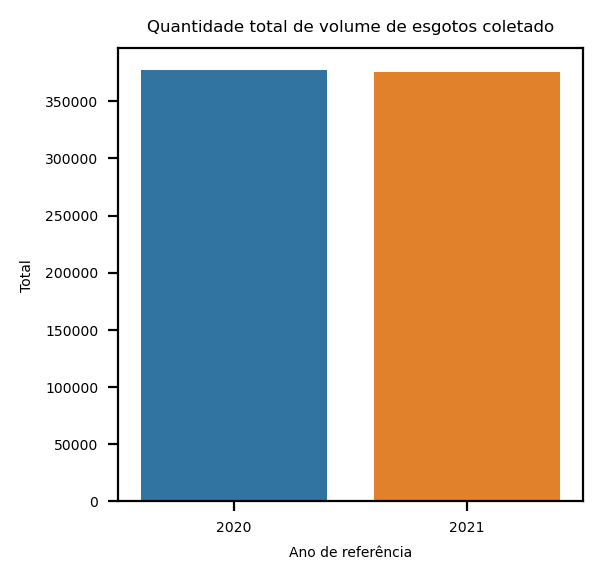

In [ ]:
barra_total(muni_esgoto_coletado, 'Quantidade total de volume de esgotos coletado')

In [ ]:
muni_esgoto_coletado

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
410090,Amaporã,4.34,100.79,2222.35,96.45
411375,Lunardelli,5.74,64.87,1030.14,59.13
411450,Manoel Ribas,11.01,123.36,1020.44,112.35
411250,Jardim Alegre,14.73,153.28,940.60,138.55
412510,São João do Triunfo,18.47,49.30,166.92,30.83
...,...,...,...,...,...
412788,Tunas do Paraná,0.00,0.00,NaN,0.00
412830,Uniflor,0.00,0.00,NaN,0.00
412860,Verê,0.00,0.00,NaN,0.00


### Volume de esgotos faturado
    

In [ ]:
muni_esgoto_faturado = variacao(snis_filtrada, 'ES007 - Volume de esgotos faturado')

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


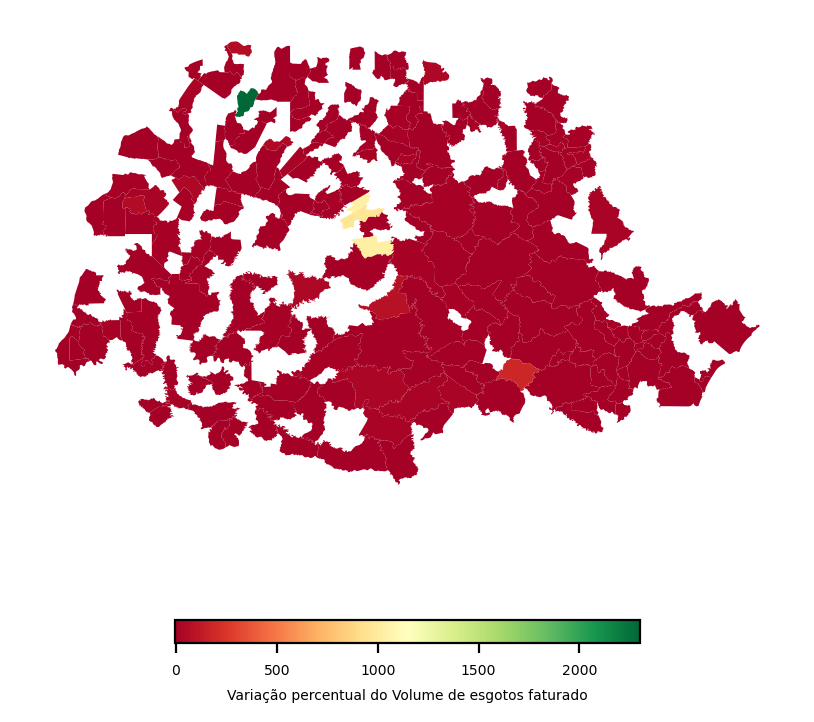

In [ ]:
mapa_muni(muni_esgoto_faturado, 'Variação percentual do Volume de esgotos faturado')

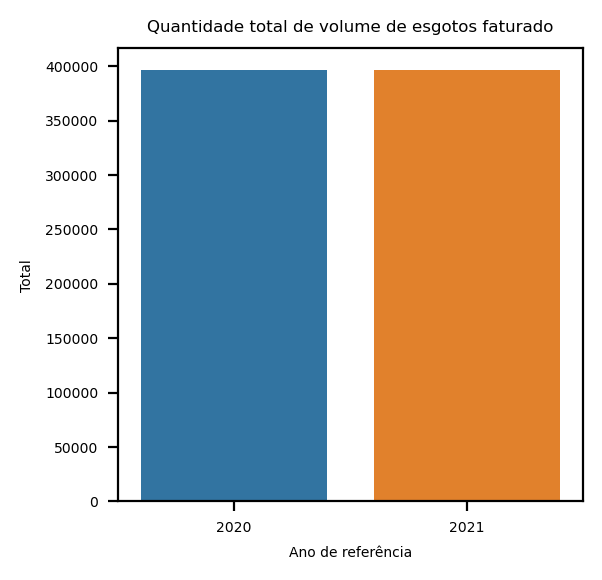

In [ ]:
barra_total(muni_esgoto_faturado, 'Quantidade total de volume de esgotos faturado')

In [ ]:
muni_esgoto_faturado

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
410090,Amaporã,4.44,106.59,2300.68,102.15
411375,Lunardelli,6.00,68.17,1036.17,62.17
411450,Manoel Ribas,11.54,129.95,1026.08,118.41
411250,Jardim Alegre,15.23,161.48,960.28,146.25
412510,São João do Triunfo,19.36,53.62,176.96,34.26
...,...,...,...,...,...
412788,Tunas do Paraná,0.00,0.00,NaN,0.00
412830,Uniflor,0.00,0.00,NaN,0.00
412860,Verê,0.00,0.00,NaN,0.00


### Volume de esgotos tratado

In [ ]:
muni_esgoto_tratado = variacao(snis_filtrada, 'ES006 - Volume de esgotos tratado')

C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


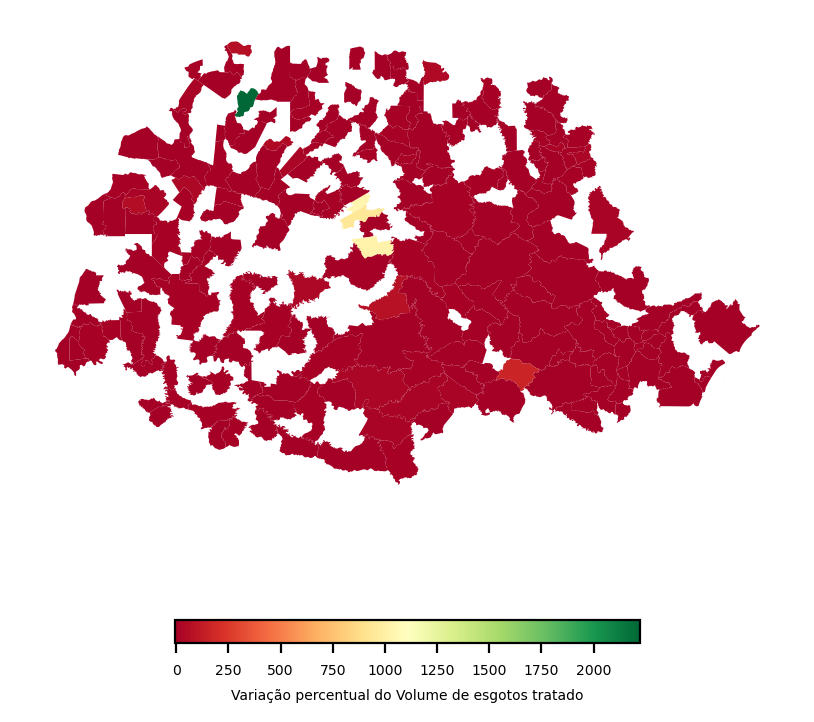

In [ ]:
mapa_muni(muni_esgoto_tratado, 'Variação percentual do Volume de esgotos tratado')

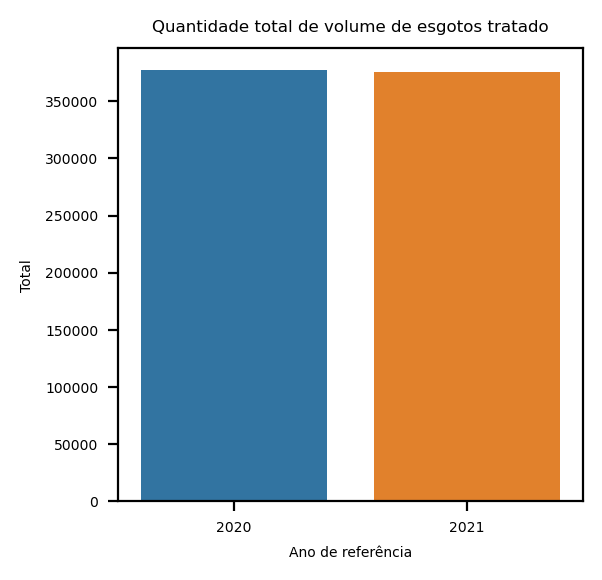

In [ ]:
barra_total(muni_esgoto_tratado, 'Quantidade total de volume de esgotos tratado')

In [ ]:
muni_esgoto_tratado

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
410090,Amaporã,4.34,100.79,2222.35,96.45
411375,Lunardelli,5.74,64.87,1030.14,59.13
411450,Manoel Ribas,11.01,123.36,1020.44,112.35
411250,Jardim Alegre,14.73,153.28,940.60,138.55
412510,São João do Triunfo,18.47,49.30,166.92,30.83
...,...,...,...,...,...
412788,Tunas do Paraná,0.00,0.00,NaN,0.00
412830,Uniflor,0.00,0.00,NaN,0.00
412860,Verê,0.00,0.00,NaN,0.00


### Extensão da rede de esgotos

In [ ]:
muni_ext_esgoto = variacao(snis_filtrada, 'ES004 - Extensão da rede de esgotos')
muni_ext_esgoto

,Ano de Referência,2020,2021,variação,variação nominal
Código do Município,Município,,,,
412790,Tuneiras do Oeste,7.10,39.19,451.97,32.09
410832,Francisco Alves,4.86,21.00,332.10,16.14
411375,Lunardelli,4.38,13.52,208.68,9.14
412862,Alto Paraíso,3.49,9.41,169.63,5.92
411610,Moreira Sales,7.96,20.49,157.41,12.53
...,...,...,...,...,...
412788,Tunas do Paraná,0.00,0.00,NaN,0.00
412830,Uniflor,0.00,0.00,NaN,0.00
412860,Verê,0.00,0.00,NaN,0.00


C:\Users\est.matheus.brasil\AppData\Roaming\Python\Python310\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\Users\est.matheus.brasil\Anaconda3\envs\boletim\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


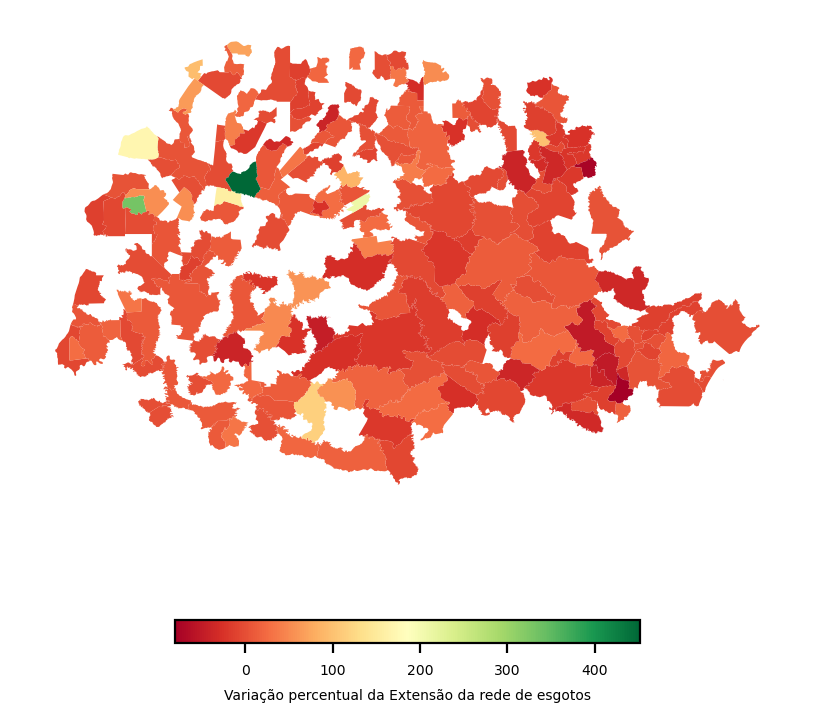

In [ ]:
mapa_muni(muni_ext_esgoto, 'Variação percentual da Extensão da rede de esgotos')

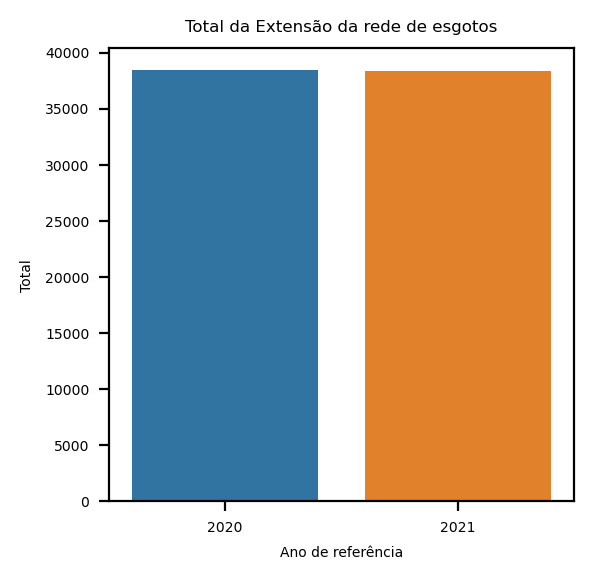

In [ ]:
barra_total(muni_ext_esgoto, 'Total da Extensão da rede de esgotos')

### Brasil

In [ ]:
brasil = pd.read_excel('dados/desagregado-BRASIL.xlsx')
brasil = brasil.drop(snis.index[-1])

In [ ]:
#cobertura de água no brasil
cobertura_br = snis.groupby('Ano de Referência')[['POP_TOT - População total do município do ano de referência (Fonte: IBGE):', 'AG001 - População total atendida com abastecimento de água']].sum()
cobertura_br['cobertura'] = cobertura_br['AG001 - População total atendida com abastecimento de água'] / cobertura_br['POP_TOT - População total do município do ano de referência (Fonte: IBGE):']
cobertura_br['var'] = cobertura_br['cobertura'].pct_change()
cobertura_br[['cobertura', 'var']] = cobertura_br[['cobertura', 'var']].round(2) * 100

In [ ]:
cobertura_br

,POP_TOT - População total do município do ano de referência (Fonte: IBGE):,AG001 - População total atendida com abastecimento de água,cobertura,var
Ano de Referência,,,,
2020,10715679.0,10203262,95.0,NaN
2021,10792108.0,10321496,96.0,0.0


In [ ]:
cobertura_agua_total

,total
Ano de Referência,
2020,95.22
2021,95.64
